### TABLE OF CONTENTS

>>>[PROJECT DESCRIPTION](#scrollTo=S_h4QZZpC2sZ)

>>>[INSTALLS](#scrollTo=8_ZkJfjcJdWc)

>>>[IMPORTS](#scrollTo=suw0llhJEuVW)

>>>[LOADING DATA](#scrollTo=wmfG0quZ4kkG)

>>>[DATA CHECK](#scrollTo=ud-7jYJx5hjq)

>>>[EDA](#scrollTo=W2trXLvF5x0v)

>>>[PROFILE REPORT](#scrollTo=C0-x05_Y-5b2)

>>>[Feature Engineering](#scrollTo=wWLAUsgt9HWw)

>>>[ANALYSIS OF THE SIGNIFICANCE OF VARIABLES BASED ON REGRESSION COEFFICIENTS](#scrollTo=pT94GAaF-r-W)

>>>[X_train, y_train, X_test, y_test PREPARATION](#scrollTo=Ej_hNeyA-8aW)

>>>[DATA BALANCE VERIFICATION FOR y_train](#scrollTo=HMGCAc9Ji6zM)

>>>[MODEL TRAINING and EVALUATION](#scrollTo=Jpf4bP0-ZkNJ)

>>>[PREDICTION FOR BEST MODEL](#scrollTo=c5tiARy4TDpt)



### 1.  PROJECT DESCRIPTION


* The aim of this project is to predict employee attrition in a company based on various factors such as demographic features, salary, job satisfaction, duration of employment, etc.
* The input data is provided in the following files: "attrition.csv", "df1.csv", and "df2.csv".
* "attrition.csv": This file contains the target class/label and employee identifiers (EmployeeNumber). The EmployeeNumber column is used to merge data from different files.
* "df1.csv" and "df2.csv": These files contain the features and employee identifiers (EmployeeNumber). Both files contain data for the same set of employees but have different features.

* df1 and df2 files need to be merged to incorporate all the features for the task. After merging the data, it needs to be split into a training and test set based on the "test_target.csv" file.

* The test data is provided in the "test_target.csv" file.

### 2. INSTALLS

In [1206]:
!pip install catboost
!pip install pandas_profiling --upgrade
!pip install markupsafe==2.0.1
!pip install flask
!pip install tempfile


  Using cached MarkupSafe-2.0.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (30 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.3.6 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


  Using cached MarkupSafe-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


ERROR: Could not find a version that satisfies the requirement tempfile (from versions: none)
ERROR: No matching distribution found for tempfile


### 3. IMPORTS

In [1207]:
#Data preparation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder # kodowanie etykiet (zmiennych kategorycznych) na postać numeryczną
from sklearn.preprocessing import StandardScaler #scaling features to a normalized range
from sklearn.feature_selection import RFE # Feature selection
from sklearn.feature_selection import SelectKBest # Feature selection
from sklearn.decomposition import PCA # Feature selection
from sklearn.pipeline import Pipeline


# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap # Gradient color defining on barplot
import seaborn as sns


# Profile report
from pandas_profiling import ProfileReport

# machine learning algorithms
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import catboost as ctb
from catboost import CatBoostClassifier

# Model assessment
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report # Model assessment
from sklearn.model_selection import GridSearchCV

# displaying result in HTML
from flask import Flask, render_template


import subprocess
import warnings

### 4. LOADING DATA

In [1208]:
attrition = pd.read_csv('attrition.csv')
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
target = pd.read_csv('test_target.csv')

### 5. DATA CHECK

In [1209]:
# Basic information for "attition" verification
attrition.info

<bound method DataFrame.info of       EmployeeNumber Attrition
0                104        No
1               1638        No
2                164        No
3                395        No
4                 53        No
...              ...       ...
4444            7975       Yes
4445            7976       Yes
4446            7977       Yes
4447            7978       Yes
4448            7979       Yes

[4449 rows x 2 columns]>

In [1210]:
# Basic information for "target" verification
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   EmployeeNumber  147 non-null    int64
 1   Attrition       147 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


In [1211]:
# Basic information for "df1" verification
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           4449 non-null   int64  
 1   Age                      4449 non-null   float64
 2   BusinessTravel           4449 non-null   object 
 3   DailyRate                4449 non-null   float64
 4   Department               4449 non-null   object 
 5   DistanceFromHome         4449 non-null   float64
 6   Education                4449 non-null   float64
 7   EducationField           4449 non-null   object 
 8   EmployeeCount            4449 non-null   float64
 9   EnvironmentSatisfaction  4449 non-null   float64
 10  Gender                   4449 non-null   object 
 11  HourlyRate               4449 non-null   float64
 12  JobInvolvement           4449 non-null   float64
 13  JobLevel                 4449 non-null   float64
 14  JobRole                 

In [1212]:
# Basic information for "df2" verification
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

In [1213]:
# Null value verification in "df2" dataframe
df2.isnull().sum()

EmployeeNumber                0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Attrition                   147
YearlyIncome                  0
dtype: int64

In [1214]:
# Basic informations for data in "df2" verification
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

Conclusion:

---

*it can be observed that column "Attirtion" in dataframe "df2" contains (4449-4302=147) nulls, which means the same numbers of records are in dataframe "target", which means that the "target" frame may have been separated from the "df2" frame*

### 6. EDA

a) New df creation by merging df1 and df2

In [1215]:
# New dataframe "data" creation by merging files: df1 and df2
data = df1.merge(df2, on = 'EmployeeNumber')
data.head(5)

EmployeeNumber   Age BusinessTravel  DailyRate              Department  \
0             104  30.0  Travel_Rarely      852.0  Research & Development   
1            1638  38.0  Travel_Rarely      397.0  Research & Development   
2             164  26.0  Travel_Rarely      841.0  Research & Development   
3             395  28.0  Travel_Rarely     1117.0  Research & Development   
4              53  35.0  Travel_Rarely      464.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0               1.0        1.0  Life Sciences            1.0   
1               2.0        2.0        Medical            1.0   
2               6.0        3.0          Other            1.0   
3               8.0        2.0  Life Sciences            1.0   
4               4.0        2.0          Other            1.0   

   EnvironmentSatisfaction  ... StockOptionLevel  TotalWorkingYears  \
0                      4.0  ...              2.0               10.0   
1                      4.0  ...              1.0               10.0   
2                      3.0  ...              0.0                5.0   
3                      4.0  ...              0.0                5.0   
4                      3.0  ...              1.0                1.0   

   TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                    1.0              2.0           10.0                 8.0   
1                    6.0              4.0            5.0                 4.0   
2                    3.0              2.0            5.0                 4.0   
3                    3.0              3.0            5.0                 3.0   
4                    3.0              3.0            1.0                 0.0   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  YearlyIncome  
0                     3.0                   0.0         No       61512.0  
1                     0.0                   2.0         No       93072.0  
2                     4.0                   3.0         No       28416.0  
3                     0.0                   2.0         No       39720.0  
4                     0.0                   0.0         No       23412.0  

[5 rows x 36 columns]

In [1216]:
data_joined_with_Attrition = data.merge(attrition, on = 'EmployeeNumber')
data_joined_with_Attrition.head(30)

EmployeeNumber   Age     BusinessTravel  DailyRate  \
0              104  30.0      Travel_Rarely      852.0   
1             1638  38.0      Travel_Rarely      397.0   
2              164  26.0      Travel_Rarely      841.0   
3              395  28.0      Travel_Rarely     1117.0   
4               53  35.0      Travel_Rarely      464.0   
5             1467  34.0      Travel_Rarely     1107.0   
6              727  32.0      Travel_Rarely     1018.0   
7              351  42.0      Travel_Rarely      269.0   
8              555  34.0  Travel_Frequently      296.0   
9              253  40.0      Travel_Rarely      989.0   
10            1363  48.0      Travel_Rarely      855.0   
11            1799  28.0      Travel_Rarely     1181.0   
12              42  39.0      Travel_Rarely      895.0   
13             724  38.0      Travel_Rarely      827.0   
14            1671  32.0      Travel_Rarely      977.0   
15            1624  18.0  Travel_Frequently      544.0   
16            1778  43.0      Travel_Rarely      244.0   
17             930  28.0      Travel_Rarely      995.0   
18             514  30.0  Travel_Frequently      464.0   
19             669  21.0      Travel_Rarely     1343.0   
20              32  53.0      Travel_Rarely     1282.0   
21            1015  30.0      Travel_Rarely      153.0   
22            1858  28.0         Non-Travel      280.0   
23            1383  34.0      Travel_Rarely      404.0   
24             894  42.0      Travel_Rarely     1265.0   
25             336  45.0      Travel_Rarely      252.0   
26             208  29.0         Non-Travel     1496.0   
27             684  45.0  Travel_Frequently      306.0   
28             362  32.0      Travel_Rarely      128.0   
29             364  28.0      Travel_Rarely      529.0   

                Department  DistanceFromHome  Education    EducationField  \
0   Research & Development               1.0        1.0     Life Sciences   
1   Research & Development               2.0        2.0           Medical   
2   Research & Development               6.0        3.0             Other   
3   Research & Development               8.0        2.0     Life Sciences   
4   Research & Development               4.0        2.0             Other   
5          Human Resources               9.0        4.0  Technical Degree   
6   Research & Development               3.0        2.0     Life Sciences   
7   Research & Development               2.0        3.0           Medical   
8                    Sales               6.0        2.0         Marketing   
9   Research & Development               4.0        1.0           Medical   
10  Research & Development               4.0        3.0     Life Sciences   
11  Research & Development               1.0        3.0     Life Sciences   
12                   Sales               5.0        3.0  Technical Degree   
13  Research & Development               1.0        4.0     Life Sciences   
14  Research & Development               2.0        3.0           Medical   
15                   Sales               3.0        2.0           Medical   
16         Human Resources               2.0        3.0     Life Sciences   
17  Research & Development               9.0        3.0           Medical   
18  Research & Development               4.0        3.0  Technical Degree   
19                   Sales              22.0        1.0  Technical Degree   
20  Research & Development               5.0        3.0             Other   
21  Research & Development               8.0        2.0     Life Sciences   
22         Human Resources               1.0        2.0     Life Sciences   
23  Research & Development               2.0        4.0  Technical Degree   
24  Research & Development               3.0        3.0     Life Sciences   
25  Research & Development               1.0        3.0             Other   
26  Research & Development               1.0        1.0  Technical Degree   
27                   Sales              26.0     

Conclusion:

---


*Comparison of the "attrition" values from the "df2" set included in the "data" set ("Attrition_X" column in the data_joined_with_Attrition" set) and the "attrition" values from the "attrition" set ("Attrition_y column in the "data_joined_with Attrition"" set)*

In [1217]:
Attrition_joined = data_joined_with_Attrition[['EmployeeNumber', 'Attrition_x', 'Attrition_y']]
Attrition_joined

EmployeeNumber Attrition_x Attrition_y
0                104          No          No
1               1638          No          No
2                164          No          No
3                395          No          No
4                 53          No          No
...              ...         ...         ...
4444            7975         Yes         Yes
4445            7976         Yes         Yes
4446            7977         Yes         Yes
4447            7978         Yes         Yes
4448            7979         Yes         Yes

[4449 rows x 3 columns]

In [1218]:
#Filter rows where values differ and are not NaN
different_rows = Attrition_joined[
    (Attrition_joined['Attrition_x'].notna()) &
    (Attrition_joined['Attrition_y'].notna()) &
    (Attrition_joined['Attrition_x'] != Attrition_joined['Attrition_y'])
]

# Displaying different values for the same 'EmployeeNumber'
if different_rows.empty:
    print("Columns 'Attrition_x' and 'Attrition_y' have the same values for the same 'EmployeeNumber'")
else:
    print("Differing rows:")
    print(different_rows)



Columns 'Attrition_x' and 'Attrition_y' have the same values for the same 'EmployeeNumber'


In [1219]:
#Filter out rows containing NaN - verification if also
filtered_rows = Attrition_joined[Attrition_joined[['Attrition_x', 'Attrition_y']].isna().any(axis=1)]

print("Rows containing NaN values:")
print(filtered_rows)


Rows containing NaN values:
      EmployeeNumber Attrition_x Attrition_y
1323          100000         NaN         NaN
1324          100001         NaN         NaN
1325          100002         NaN         NaN
1326          100003         NaN         NaN
1327          100004         NaN         NaN
...              ...         ...         ...
1465          100142         NaN         NaN
1466          100143         NaN         NaN
1467          100144         NaN         NaN
1468          100145         NaN         NaN
1469          100146         NaN         NaN

[147 rows x 3 columns]


In [1220]:
# Check if values differ for a given 'EmployeeNumber'
different_values = filtered_rows.groupby('EmployeeNumber')[['Attrition_x', 'Attrition_y']].nunique()

# Display rows where values differ
different_values = different_values[different_values > 1].dropna()
print("Rows where values in columns 'Attrition_x' and 'Attrition_y' differ:")
print(different_values)


Rows where values in columns 'Attrition_x' and 'Attrition_y' differ:
Empty DataFrame
Columns: [Attrition_x, Attrition_y]
Index: []



Premise:

---


*Due to the fact that the "attrition.csv" file contains extracted data from the df2 dataframe, which has been already included in the "data" dataset, the "attrition.csv" file contains duplicated data in comparition with "data" set. Therefore, work will be continued with the "data" dataframe and will not merge the "attrition.csv" dataset into the "data" dataframe.*

In [1221]:
# Checking basic informations for data in "data"
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

b) Dataset "data" basic information

In [1222]:
data.describe()

EmployeeNumber          Age    DailyRate  DistanceFromHome  \
count     4449.000000  4449.000000  4449.000000       4449.000000   
mean      7956.865588   416.187458   801.017982      33339.433356   
std      17226.922333  1566.205147   405.605362     145352.131423   
min          1.000000    18.000000   102.000000          1.000000   
25%       1735.000000    31.000000   458.000000          2.000000   
50%       5902.000000    36.000000   804.000000          8.000000   
75%       7014.000000    45.000000  1162.000000         17.000000   
max     100146.000000  9890.000000  1499.000000     999590.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  4449.000000         4449.0              4449.000000  4449.000000   
mean      2.909867            1.0                 2.719263    65.977073   
std       1.025184            0.0                 1.093263    20.277369   
min       1.000000            1.0                 1.000000    30.000000   
25%       2.000000            1.0                 2.000000    48.000000   
50%       3.000000            1.0                 3.000000    66.000000   
75%       4.000000            1.0                 4.000000    84.000000   
max       5.000000            1.0                 4.000000   100.000000   

       JobInvolvement     JobLevel  ...  StandardHours  StockOptionLevel  \
count     4449.000000  4449.000000  ...         4449.0       4449.000000   
mean         2.739492     2.053495  ...           80.0          0.785795   
std          0.712660     1.102979  ...            0.0          0.848038   
min          1.000000     1.000000  ...           80.0          0.000000   
25%          2.000000     1.000000  ...           80.0          0.000000   
50%          3.000000     2.000000  ...           80.0          1.000000   
75%          3.000000     3.000000  ...           80.0          1.000000   
max          4.000000     5.000000  ...           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        4449.000000            4449.000000      4449.000000   
mean          342.691616               2.808946         2.764217   
std          1484.151875               1.306080         0.710859   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            17.000000               3.000000         3.000000   
max          9939.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     4449.000000         4449.000000              4449.000000   
mean       302.743313          355.125646               385.886716   
std       1352.211854         1456.887417              1572.914217   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%         10.000000            7.000000                 4.000000   
max       9984.000000         9937.000000              9990.000000   

       YearsWithCurrManager   YearlyIncome  
count           4449.000000    4449.000000  
mean             323.842886   77621.952798  
std             1409.370519   56194.865060  
min                0.000000   12108.000000  
25%                2.000000   34788.000000  
50%                3.000000   58512.000000  
75%                7.000000  100152.000000  
max             9882.000000  239988.000000  

[8 rows x 27 columns]

In [1223]:
#verification of columns MonthlyIncome, YearlyIncome
Monthly_vs_Yearly = data[['MonthlyIncome', "YearlyIncome"]]

Monthly_vs_Yearly['factor'] = Monthly_vs_Yearly['YearlyIncome'] / Monthly_vs_Yearly['MonthlyIncome']

print(Monthly_vs_Yearly)

Monthly_vs_Yearly.describe()

      MonthlyIncome  YearlyIncome  factor
0            5126.0       61512.0    12.0
1            7756.0       93072.0    12.0
2            2368.0       28416.0    12.0
3            3310.0       39720.0    12.0
4            1951.0       23412.0    12.0
...             ...           ...     ...
4444         7978.0       95736.0    12.0
4445         7978.0       95736.0    12.0
4446         3708.0       44496.0    12.0
4447         3708.0       44496.0    12.0
4448         3708.0       44496.0    12.0

[4449 rows x 3 columns]


MonthlyIncome   YearlyIncome  factor
count    4449.000000    4449.000000  4449.0
mean     6468.496067   77621.952798    12.0
std      4682.905422   56194.865060     0.0
min      1009.000000   12108.000000    12.0
25%      2899.000000   34788.000000    12.0
50%      4876.000000   58512.000000    12.0
75%      8346.000000  100152.000000    12.0
max     19999.000000  239988.000000    12.0

Premise:

---



---


Due to the fact that the YearlyIncome column does not provide any new values and is simply a multiplication of the MonthlyIncome column x 12 months, the YearlyIncome column will be removed from the "data" dataframe.

In [1224]:
# Removing the YearlyIncome column from the dataframe data

data=data.drop('YearlyIncome', axis = 1)

In [1225]:
# CSV file as archiwum, csv file consist of merged data from df1 and df2

data.to_csv('data.csv', index=True)

c) Splitting the train and test dataset, without separating the label(y)

In [1226]:
#training dataframe creation without data for test X_test
# if target dataframe contains test data, and if "data" dataframe has nulls the same as in target this means that "train" data
# is "data"-"nulls"
train_DF = data.loc[data['Attrition'].notnull()]

# and "test" data is "data" only with "null" attition
X_test = data.loc[data['Attrition'].isnull()]

In [1227]:
train_DF

EmployeeNumber     Age BusinessTravel  DailyRate  \
0                104    30.0  Travel_Rarely      852.0   
1               1638    38.0  Travel_Rarely      397.0   
2                164    26.0  Travel_Rarely      841.0   
3                395    28.0  Travel_Rarely     1117.0   
4                 53    35.0  Travel_Rarely      464.0   
...              ...     ...            ...        ...   
4444            7975  8823.0  Travel_Rarely      621.0   
4445            7976  8823.0  Travel_Rarely      621.0   
4446            7977    44.0     Non-Travel      381.0   
4447            7978    44.0     Non-Travel      381.0   
4448            7979    44.0     Non-Travel      381.0   

                  Department  DistanceFromHome  Education EducationField  \
0     Research & Development               1.0        1.0  Life Sciences   
1     Research & Development               2.0        2.0        Medical   
2     Research & Development               6.0        3.0          Other   
3     Research & Development               8.0        2.0  Life Sciences   
4     Research & Development               4.0        2.0          Other   
...                      ...               ...        ...            ...   
4444  Research & Development              15.0        3.0        Medical   
4445  Research & Development              15.0        3.0        Medical   
4446  Research & Development          918785.0        3.0        Medical   
4447  Research & Development          918785.0        3.0        Medical   
4448  Research & Development          918785.0        3.0        Medical   

      EmployeeCount  EnvironmentSatisfaction  ... StandardHours  \
0               1.0                      4.0  ...          80.0   
1               1.0                      4.0  ...          80.0   
2               1.0                      3.0  ...          80.0   
3               1.0                      4.0  ...          80.0   
4               1.0                      3.0  ...          80.0   
...             ...                      ...  ...           ...   
4444            1.0                      1.0  ...          80.0   
4445            1.0                      1.0  ...          80.0   
4446            1.0                      1.0  ...          80.0   
4447            1.0                      1.0  ...          80.0   
4448            1.0                      1.0  ...          80.0   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                  2.0               10.0                    1.0   
1                  1.0               10.0                    6.0   
2                  0.0                5.0                    3.0   
3                  0.0                5.0                    3.0   
4                  1.0                1.0                    3.0   
...                ...                ...                    ...   
4444               1.0               10.0                    2.0   
4445               1.0               10.0                    2.0   
4446               0.0                9.0                    5.0   
4447               0.0                9.0                    5.0   
4448               0.0                9.0                    5.0   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                2.0            10.0                8.0   
1                4.0             5.0                4.0   
2                2.0             5.0                4.0   
3                3.0             5.0                3.0   
4                3.0             1.0                0.0   
...              ...             ...                ...   
4444             3.0            10.0                7.0   
4445             3.0            10.0                7.0   
4446             3.0             5.0                2.0   
4447             3.0             5.0                2.0   
4448             3.0             5.0                2.0   

      YearsSinceLastPromotion  YearsWithCurrManager  Attrition  


In [1228]:
X_test

EmployeeNumber   Age BusinessTravel  DailyRate              Department  \
1323          100000  35.0  Travel_Rarely     1343.0  Research & Development   
1324          100001  27.0  Travel_Rarely     1220.0  Research & Development   
1325          100002  24.0  Travel_Rarely     1476.0                   Sales   
1326          100003  37.0     Non-Travel      142.0                   Sales   
1327          100004  33.0  Travel_Rarely      527.0  Research & Development   
...              ...   ...            ...        ...                     ...   
1465          100142  35.0     Non-Travel      208.0  Research & Development   
1466          100143  41.0  Travel_Rarely      582.0  Research & Development   
1467          100144  42.0  Travel_Rarely     1396.0  Research & Development   
1468          100145  44.0  Travel_Rarely      621.0  Research & Development   
1469          100146  44.0     Non-Travel      381.0  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1323              27.0        1.0        Medical            1.0   
1324               5.0        3.0  Life Sciences            1.0   
1325               4.0        1.0        Medical            1.0   
1326               9.0        4.0        Medical            1.0   
1327               1.0        4.0          Other            1.0   
...                ...        ...            ...            ...   
1465               8.0        4.0  Life Sciences            1.0   
1466              28.0        4.0  Life Sciences            1.0   
1467               6.0        3.0        Medical            1.0   
1468              15.0        3.0        Medical            1.0   
1469              24.0        3.0        Medical            1.0   

      EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
1323                      3.0  ...          80.0               0.0   
1324                      3.0  ...          80.0               0.0   
1325                      4.0  ...          80.0               2.0   
1326                      1.0  ...          80.0               1.0   
1327                      4.0  ...          80.0               0.0   
...                       ...  ...           ...               ...   
1465                      3.0  ...          80.0               1.0   
1466                      1.0  ...          80.0               1.0   
1467                      3.0  ...          80.0               1.0   
1468                      1.0  ...          80.0               1.0   
1469                      1.0  ...          80.0               0.0   

      TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
1323                6.0                    3.0             2.0   
1324                4.0                    2.0             2.0   
1325                5.0                    3.0             3.0   
1326                9.0                    6.0             3.0   
1327               10.0                    2.0             2.0   
...                 ...                    ...             ...   
1465               15.0                    5.0             3.0   
1466               21.0                    3.0             3.0   
1467               18.0                    3.0             4.0   
1468               10.0                    2.0             3.0   
1469                9.0                    5.0             3.0   

      YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
1323             6.0                5.0                      1.0   
1324             4.0                3.0                      1.0   
1325             5.0                4.0                      0.0   
1326             9.0                5.0                      7.0   
1327            10.0                9.0                      7.0   
...              ...                ...                      ...   
1465            14.0               11.0                      2.0   
1466            20.0                7.0                      0

In [1229]:
train_DF.describe()

EmployeeNumber          Age    DailyRate  DistanceFromHome  \
count     4302.000000  4302.000000  4302.000000       4302.000000   
mean      4809.243143   429.123199   800.843794      34478.313343   
std       2643.040205  1591.153416   405.655763     147682.315767   
min          1.000000    18.000000   102.000000          1.000000   
25%       1680.250000    31.000000   457.000000          2.000000   
50%       5828.500000    36.000000   804.000000          8.000000   
75%       6903.750000    45.000000  1162.000000         17.000000   
max       7979.000000  9890.000000  1499.000000     999590.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  4302.000000         4302.0              4302.000000  4302.000000   
mean      2.906788            1.0                 2.719665    66.036495   
std       1.026460            0.0                 1.092333    20.298352   
min       1.000000            1.0                 1.000000    30.000000   
25%       2.000000            1.0                 2.000000    48.000000   
50%       3.000000            1.0                 3.000000    66.000000   
75%       4.000000            1.0                 4.000000    84.000000   
max       5.000000            1.0                 4.000000   100.000000   

       JobInvolvement     JobLevel  ...  RelationshipSatisfaction  \
count     4302.000000  4302.000000  ...               4302.000000   
mean         2.741516     2.051604  ...                  2.725709   
std          0.711379     1.102569  ...                  1.079747   
min          1.000000     1.000000  ...                  1.000000   
25%          2.000000     1.000000  ...                  2.000000   
50%          3.000000     2.000000  ...                  3.000000   
75%          3.000000     3.000000  ...                  4.000000   
max          4.000000     5.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4302.0       4302.000000        4302.000000   
mean            80.0          0.787773         354.004649   
std              0.0          0.849147        1508.016854   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          17.000000   
max             80.0          3.000000        9939.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            4302.000000      4302.000000     4302.000000   
mean                2.803347         2.765923      312.854719   
std                 1.302586         0.708878     1373.999529   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000     9984.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         4302.000000              4302.000000           4302.000000  
mean           367.109484               399.000930            334.767550  
std           1480.107024              1597.939659           1431.991884  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 4.000000              7.000000  
max           9937.000000              9990.000000           9882.000000  

[8 rows x 26 columns]

In [1230]:
X_test.describe()

EmployeeNumber         Age    DailyRate  DistanceFromHome   Education  \
count      147.000000  147.000000   147.000000        147.000000  147.000000   
mean    100073.000000   37.619048   806.115646          9.761905    3.000000   
std         42.579338    8.786145   405.476187          8.412591    0.986206   
min     100000.000000   19.000000   117.000000          1.000000    1.000000   
25%     100036.500000   31.000000   479.500000          2.500000    3.000000   
50%     100073.000000   36.000000   773.000000          8.000000    3.000000   
75%     100109.500000   43.500000  1163.000000         15.000000    4.000000   
max     100146.000000   60.000000  1499.000000         29.000000    5.000000   

       EmployeeCount  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count          147.0               147.000000  147.000000      147.000000   
mean             1.0                 2.707483   64.238095        2.680272   
std              0.0                 1.123905   19.640723        0.749305   
min              1.0                 1.000000   30.000000        1.000000   
25%              1.0                 2.000000   48.500000        2.000000   
50%              1.0                 3.000000   64.000000        3.000000   
75%              1.0                 4.000000   80.000000        3.000000   
max              1.0                 4.000000   99.000000        4.000000   

         JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  147.000000  ...                147.000000          147.0   
mean     2.108844  ...                  2.721088           80.0   
std      1.117294  ...                  1.115165            0.0   
min      1.000000  ...                  1.000000           80.0   
25%      1.000000  ...                  2.000000           80.0   
50%      2.000000  ...                  3.000000           80.0   
75%      3.000000  ...                  4.000000           80.0   
max      5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        147.000000         147.000000             147.000000   
mean           0.727891          11.612245               2.972789   
std            0.815583           7.457137               1.399342   
min            0.000000           1.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          17.000000               3.000000   
max            3.000000          36.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       147.000000      147.000000          147.000000   
mean          2.714286        6.829932            4.414966   
std           0.767490        5.414812            3.387818   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       29.000000           16.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               147.000000            147.000000  
mean                  2.095238              4.129252  
std                   2.977848              3.310987  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   2.500000              7.000000  
max                  15.000000             14.000000  

[8 rows x 26 columns]

In [1231]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   BusinessTravel            4302 non-null   object 
 3   DailyRate                 4302 non-null   float64
 4   Department                4302 non-null   object 
 5   DistanceFromHome          4302 non-null   float64
 6   Education                 4302 non-null   float64
 7   EducationField            4302 non-null   object 
 8   EmployeeCount             4302 non-null   float64
 9   EnvironmentSatisfaction   4302 non-null   float64
 10  Gender                    4302 non-null   object 
 11  HourlyRate                4302 non-null   float64
 12  JobInvolvement            4302 non-null   float64
 13  JobLevel                  4302 non-null   float64
 14  JobRole 

In [1232]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1323 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            147 non-null    int64  
 1   Age                       147 non-null    float64
 2   BusinessTravel            147 non-null    object 
 3   DailyRate                 147 non-null    float64
 4   Department                147 non-null    object 
 5   DistanceFromHome          147 non-null    float64
 6   Education                 147 non-null    float64
 7   EducationField            147 non-null    object 
 8   EmployeeCount             147 non-null    float64
 9   EnvironmentSatisfaction   147 non-null    float64
 10  Gender                    147 non-null    object 
 11  HourlyRate                147 non-null    float64
 12  JobInvolvement            147 non-null    float64
 13  JobLevel                  147 non-null    float64
 14  JobRol

### PROFILE REPORT

In [1233]:
prof = ProfileReport(train_DF)

In [1234]:
prof.to_file('report_train_DF.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [1235]:
prof = ProfileReport(X_test)

In [1236]:
prof.to_file('report_X_test.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [1237]:
# column names
columns=train_DF.columns
columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [1238]:
len(columns)
#therefore, number of features = 36-1=35

35

In [1239]:
train_DF.isna().sum()

EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [1240]:
#checking value in "YearsAtCompany" column
train_DF['YearsAtCompany'].describe()

count    4302.000000
mean      312.854719
std      1373.999529
min         0.000000
25%         3.000000
50%         5.000000
75%        10.000000
max      9984.000000
Name: YearsAtCompany, dtype: float64

In [1241]:
#checking data suspicious to be outliers in column "YearsAtCompany"
print(train_DF[train_DF['YearsAtCompany'] > 30])

      EmployeeNumber   Age     BusinessTravel  DailyRate  \
92               374  55.0      Travel_Rarely      452.0   
353              131  58.0      Travel_Rarely      682.0   
356              259  52.0      Travel_Rarely      699.0   
361              165  58.0      Travel_Rarely      147.0   
382             1572  53.0      Travel_Rarely      607.0   
...              ...   ...                ...        ...   
4369            7900  33.0      Travel_Rarely     1242.0   
4370            7901  33.0      Travel_Rarely     1242.0   
4405            7936  38.0  Travel_Frequently      148.0   
4433            7964  37.0      Travel_Rarely      921.0   
4434            7965  37.0      Travel_Rarely      921.0   

                  Department  DistanceFromHome  Education    EducationField  \
92    Research & Development               1.0        3.0           Medical   
353                    Sales              10.0        4.0           Medical   
356   Research & Development              

d) Dupliacates

In [1242]:
#dupliacted rows

duplicates_mask=train_DF.duplicated(subset=['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'])

duplicated_train_DF = train_DF[duplicates_mask]
duplicated_train_DF
duplicated_train_DF.to_csv('Duplicates.csv')

In [1243]:
#duplicates removing
train_DF.drop_duplicates (subset=train_DF[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition']], keep='first', inplace=True)

In [1244]:
#verification of train_DF dataframe after dropping duplicates (1237 duplicates removed)
train_DF.shape

(3065, 35)

e) Unique values

In [1245]:
#Printing all unique values from individual columns
for column in train_DF.columns:

    unique_values = train_DF[column].unique()

    print(f"Unique value for column: {column}:")

    print(unique_values)

    print()

Unique value for column: EmployeeNumber:
[ 104 1638  164 ... 7973 7974 7977]

Unique value for column: Age:
[  30.   38.   26.   28.   35.   34.   32.   42.   40.   48.   39.   18.
   43.   21.   53.   45.   29.   33.   41.   24.   37.   50.   36.   52.
   47.   31.   49.   54.   44.   22.   46.   27.   55.   59.   25.   23.
   56.   20.   60.   51.   58.   19.   57. 8825. 3628. 6287. 9330. 1107.
 4454. 9155. 9890. 1189. 9195. 9014. 1136. 5582. 2404. 1541. 4510. 4322.
 4988. 8388. 2530. 8901. 2852. 2459. 2982. 4973. 8534. 8314. 4130. 4328.
 7952. 8699. 3147. 8889. 3871. 9531. 8167. 5257. 8136. 7390. 2993. 5672.
 5933. 5614. 5007. 3095. 9219. 6749. 4515. 6715. 1141. 8949. 3636. 4805.
 5959. 9384. 8042. 1423. 7056. 5116. 2667. 8703. 1126. 9612. 7845. 6998.
 1788. 6727. 5377. 5565. 4558. 6506. 4591. 7662. 6510. 4985. 9581. 2095.
 2275. 6399. 4935. 2698. 7617. 9661. 4834. 2242. 1915. 3226. 7924. 9529.
 8326. 1578. 8560. 9078. 6429. 9243. 2186. 2888. 6210. 3388. 2423. 6025.
 1530. 7017. 413

f) Outliers

Boxplot analysis was performed to identify outliers in the sets.


Outliers verification through boxplots (rejecting columns without numerical data) - for train data

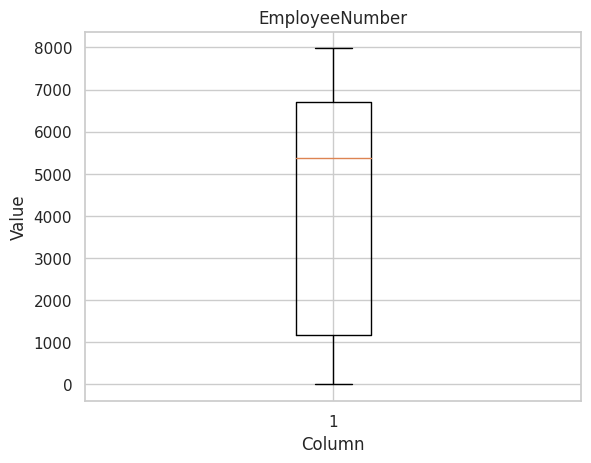

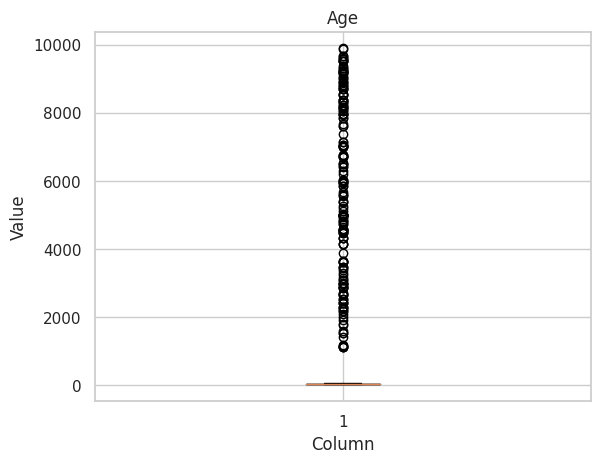

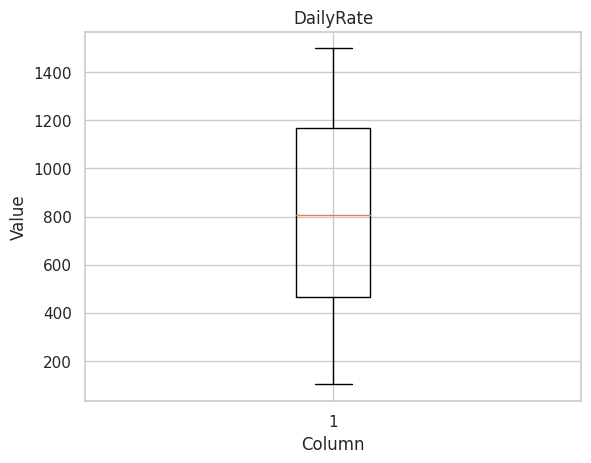

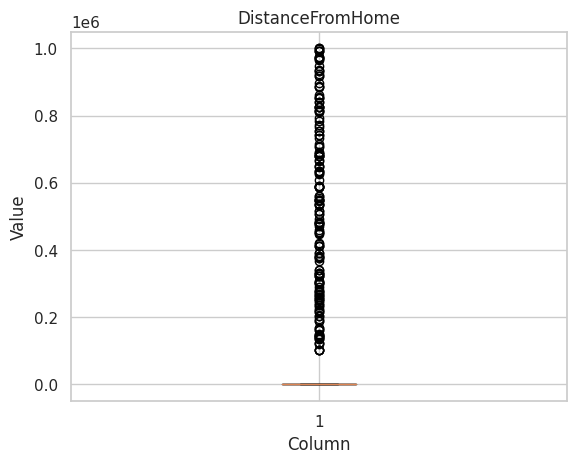

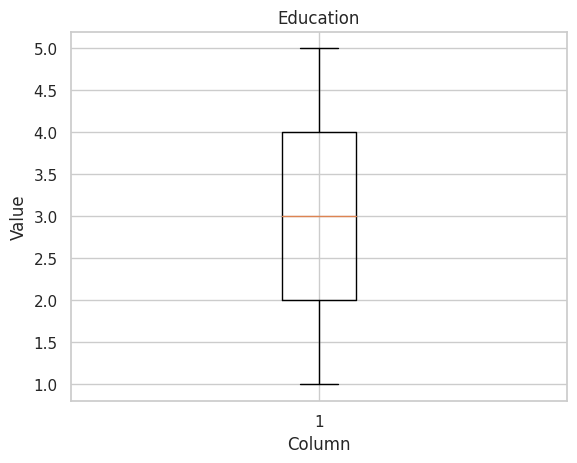

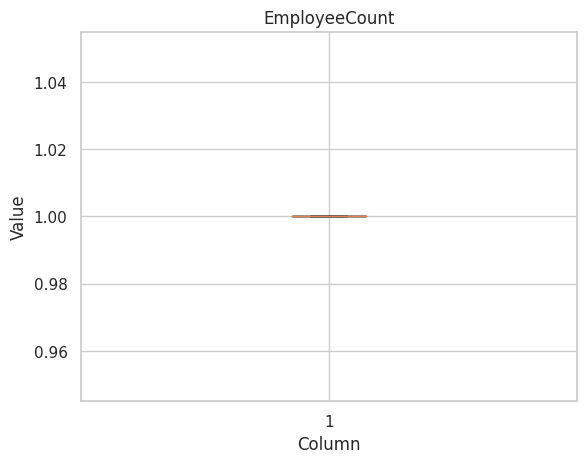

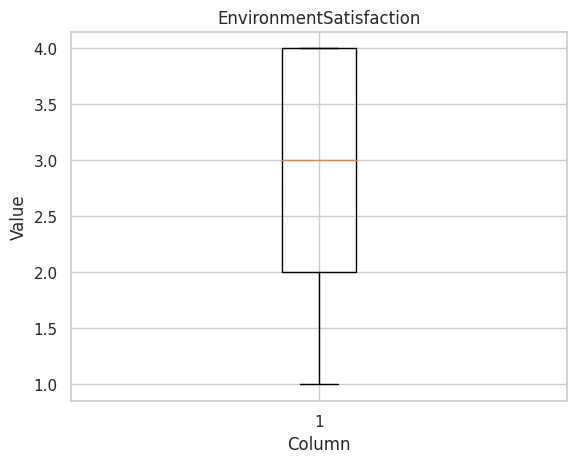

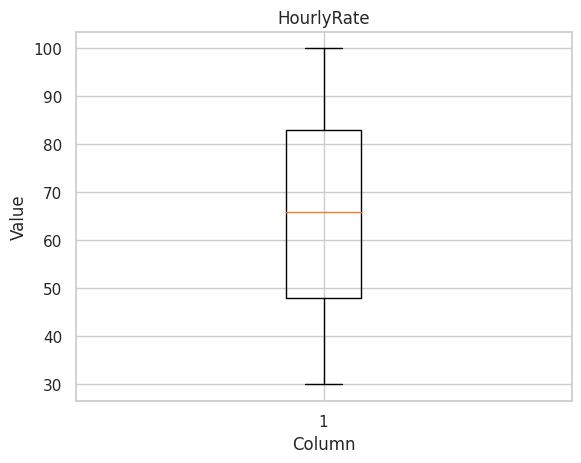

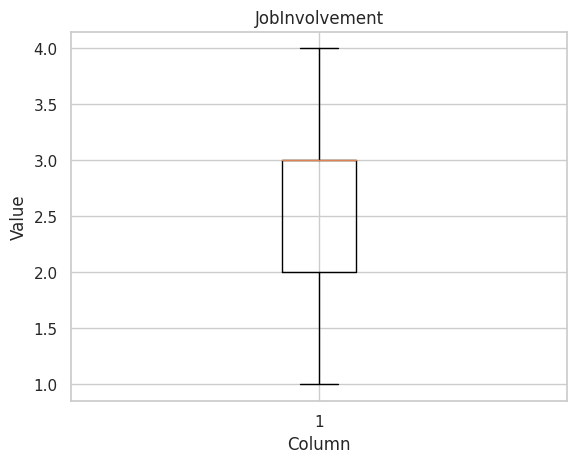

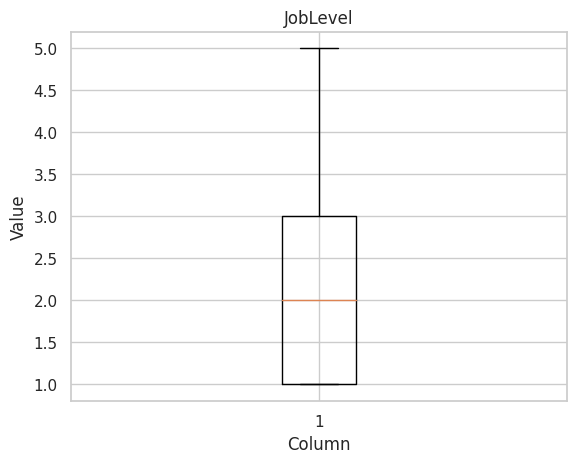

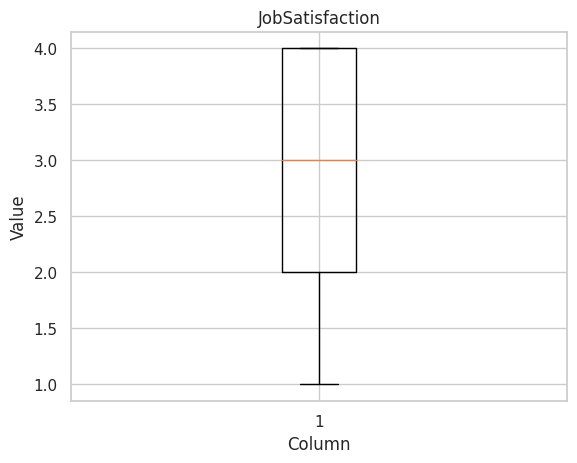

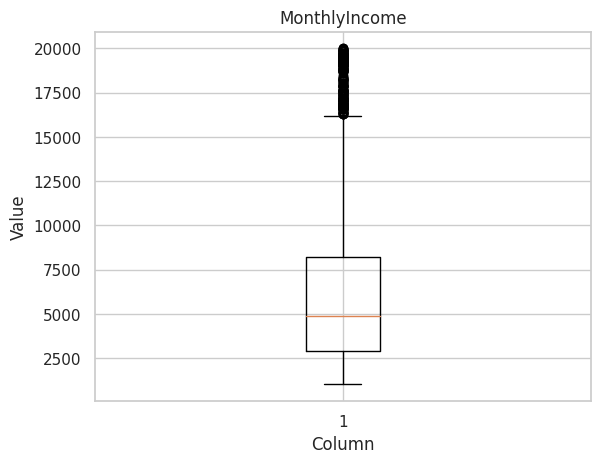

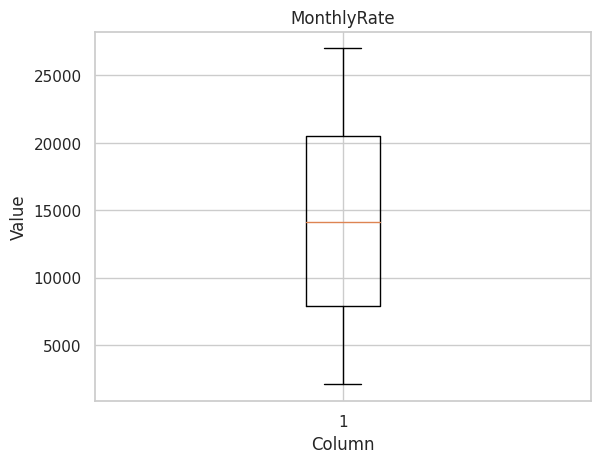

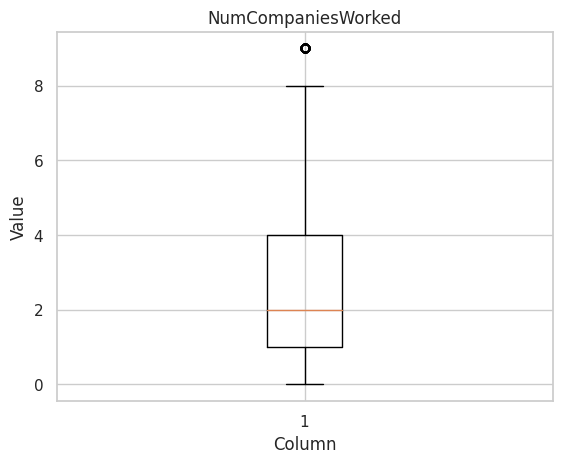

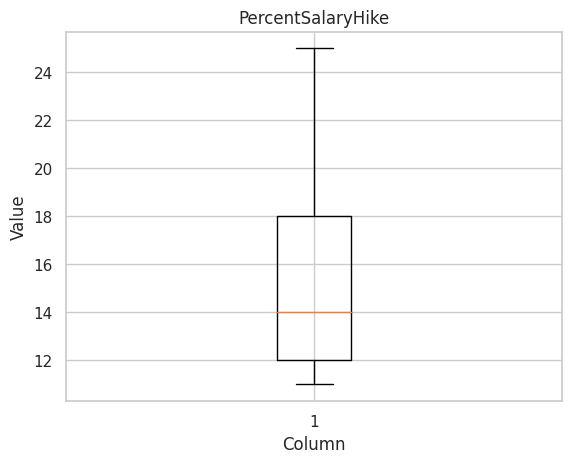

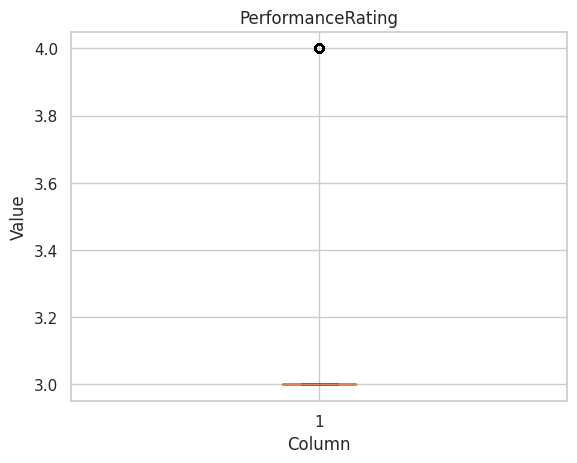

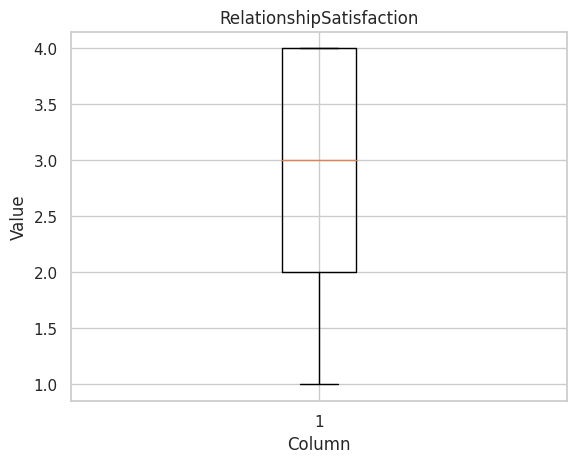

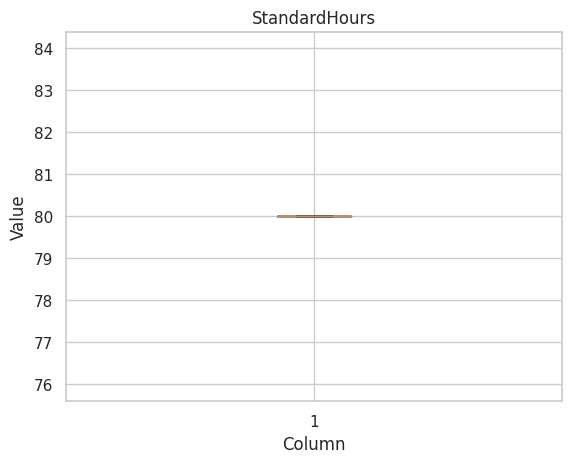

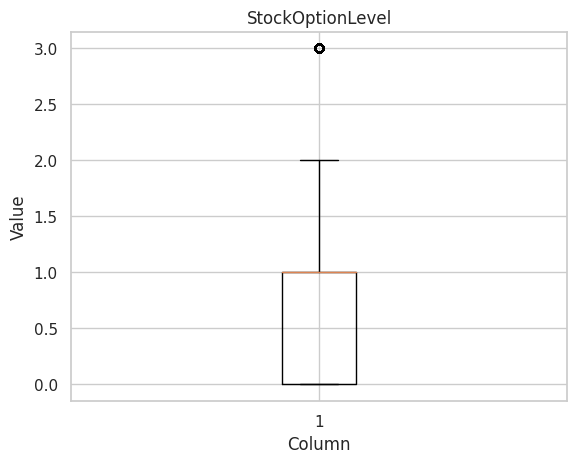

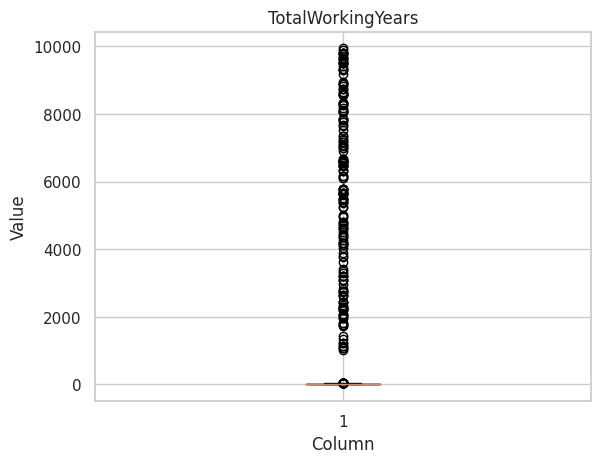

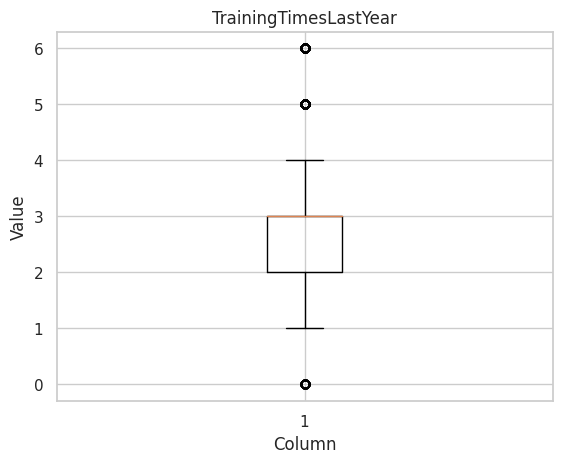

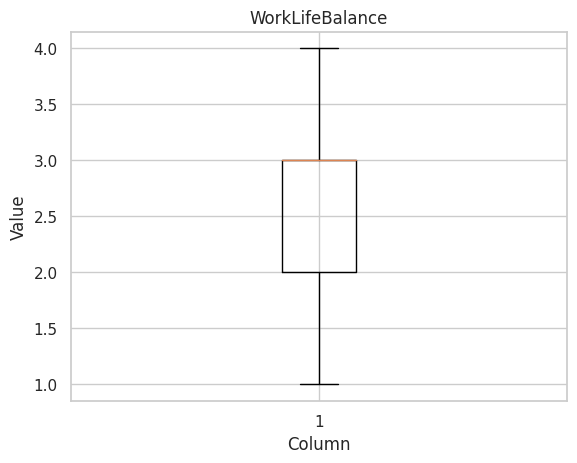

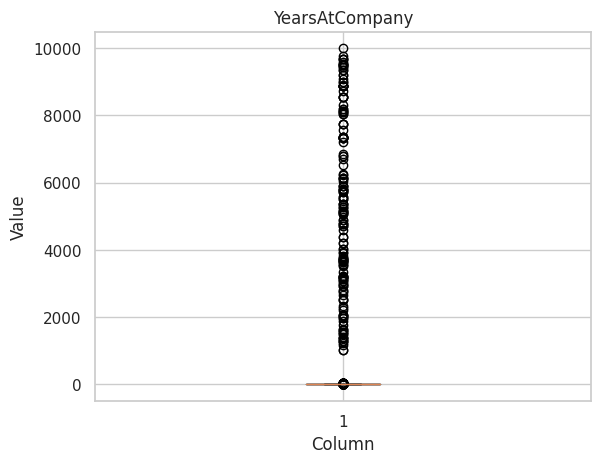

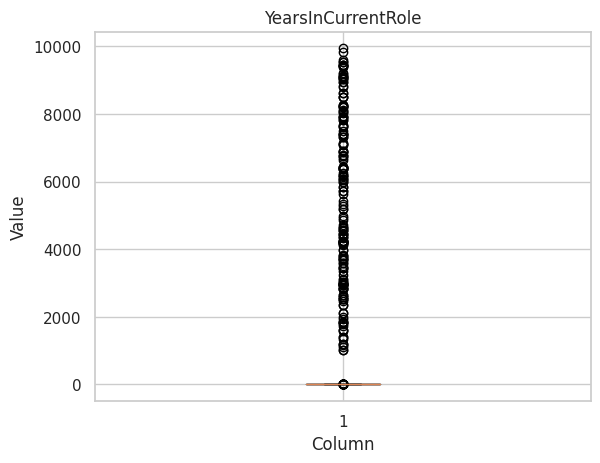

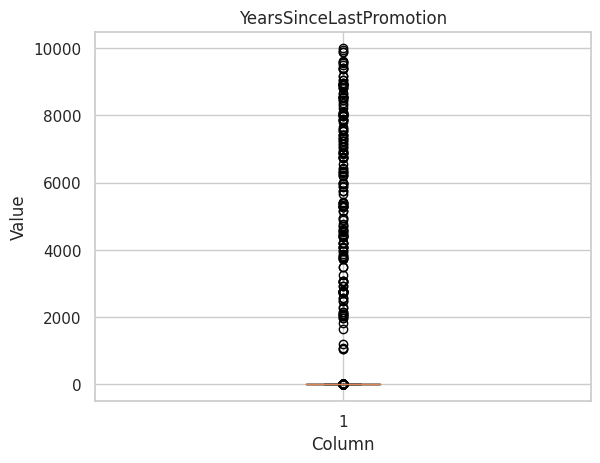

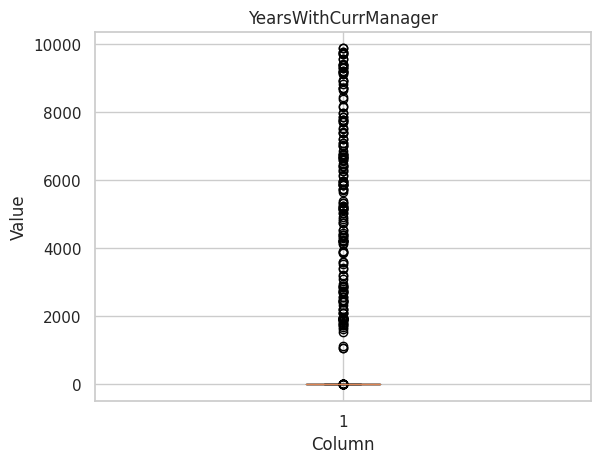

In [1246]:
for column in train_DF.columns:
    if(np.issubdtype(train_DF[column].dtype, np.number)):
        plt.figure()
        plt.boxplot(train_DF[column])
        plt.title(column)
        plt.xlabel('Column')
        plt.ylabel('Value')

Outliers verification for X_test data

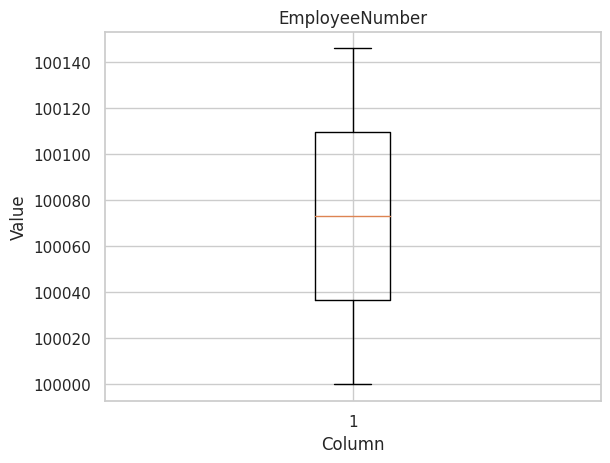

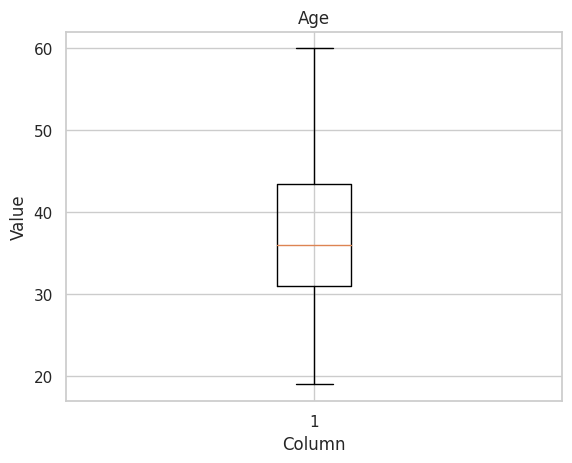

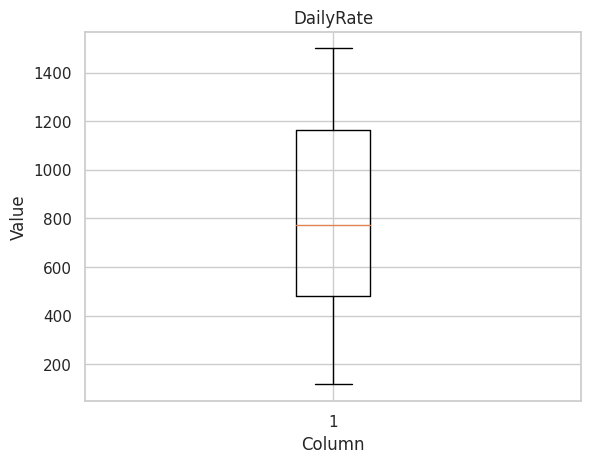

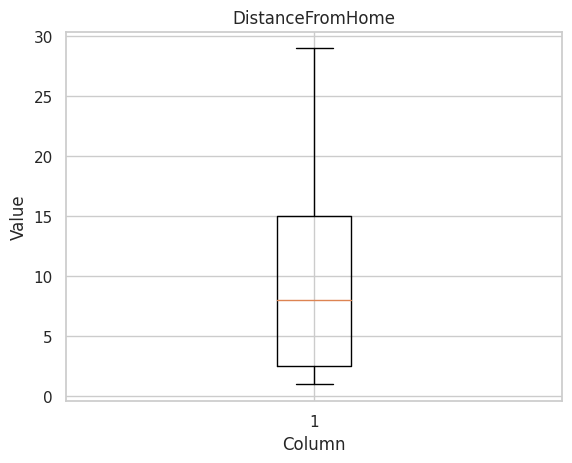

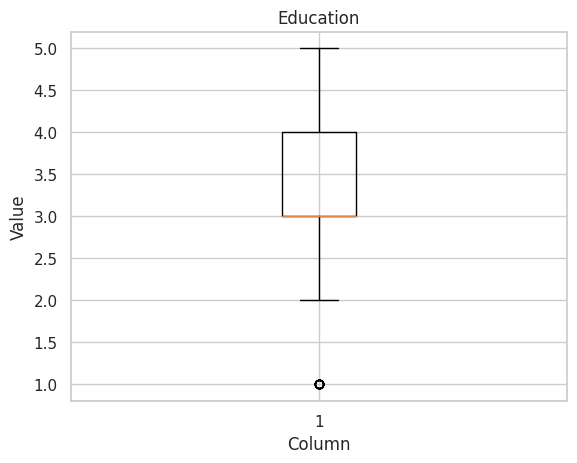

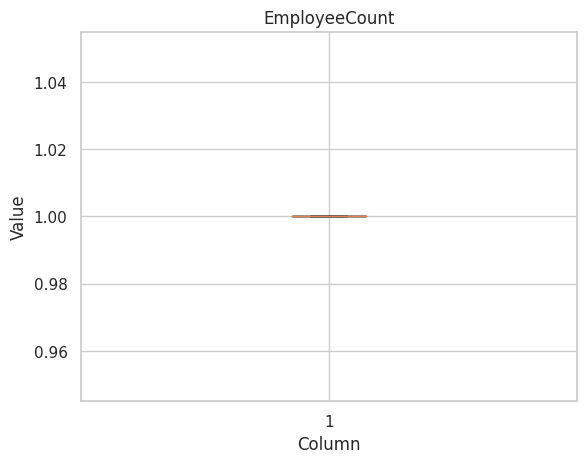

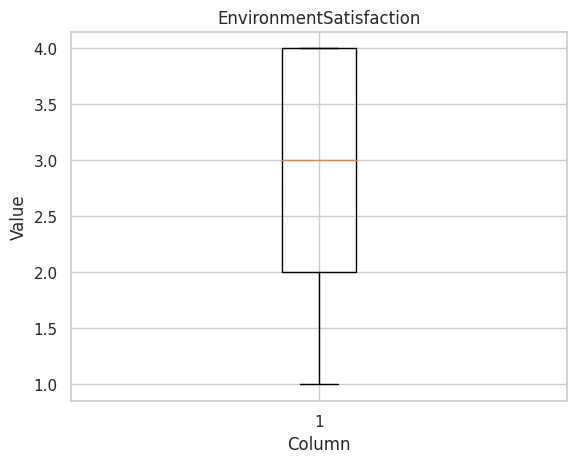

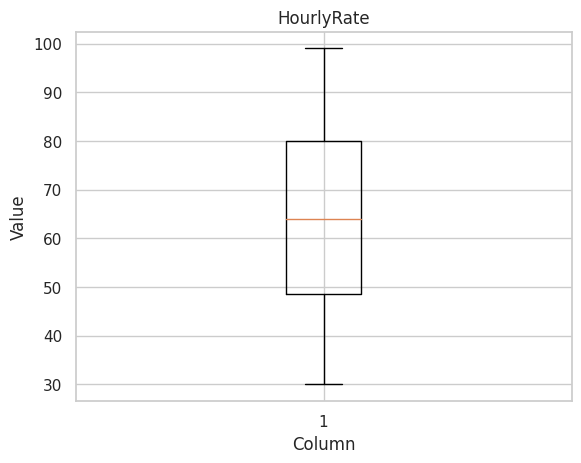

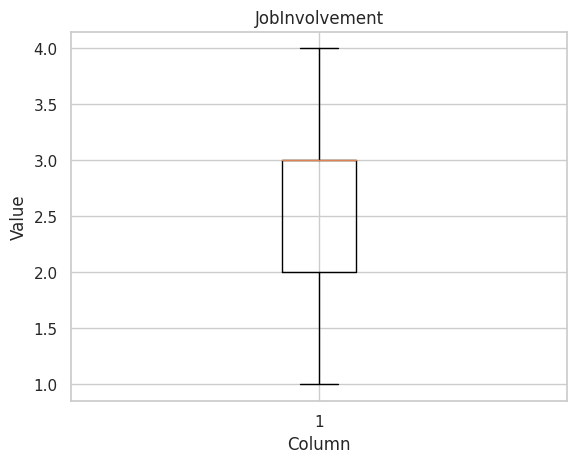

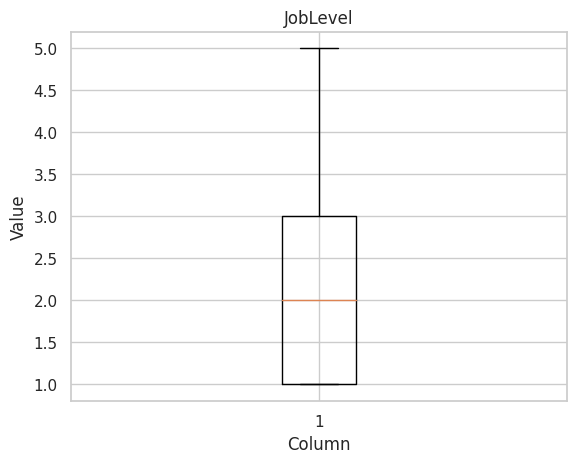

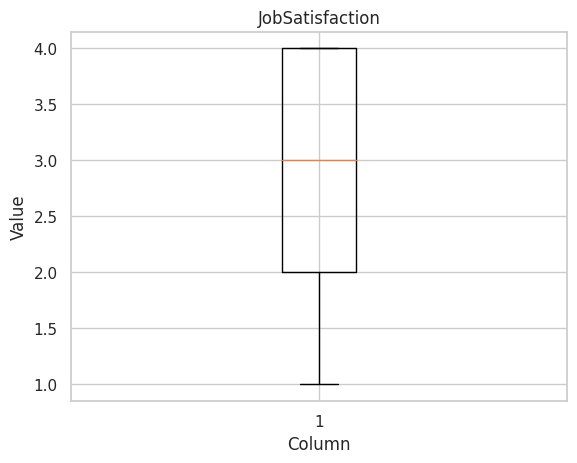

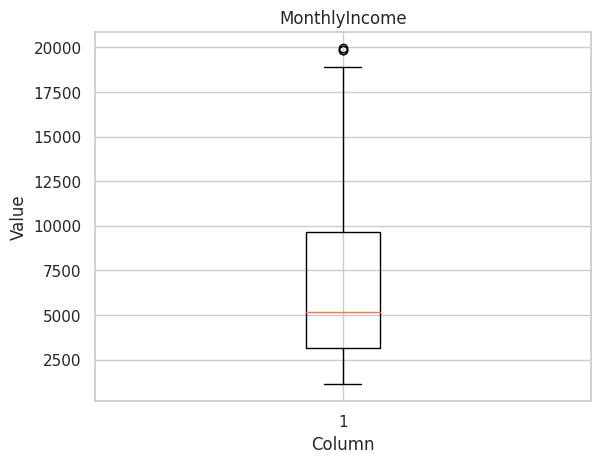

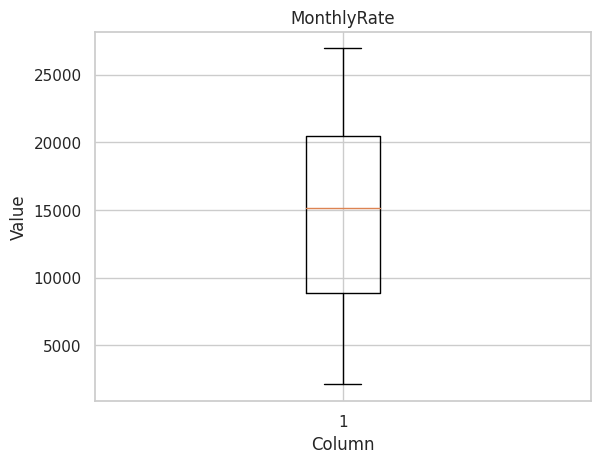

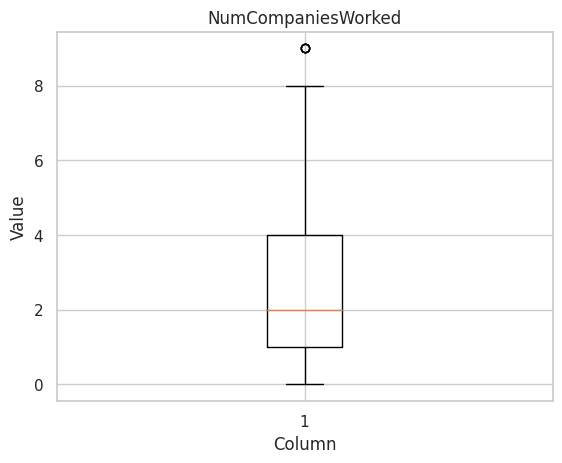

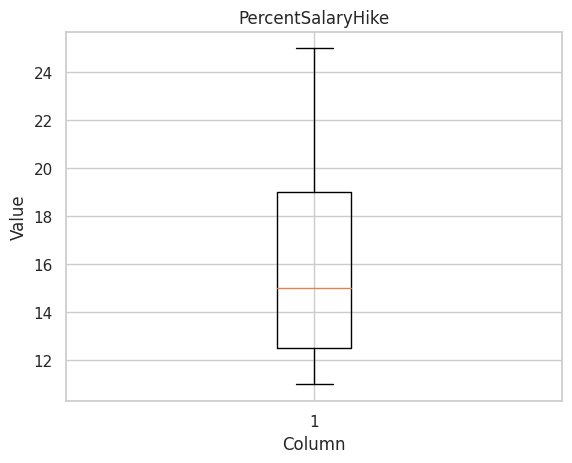

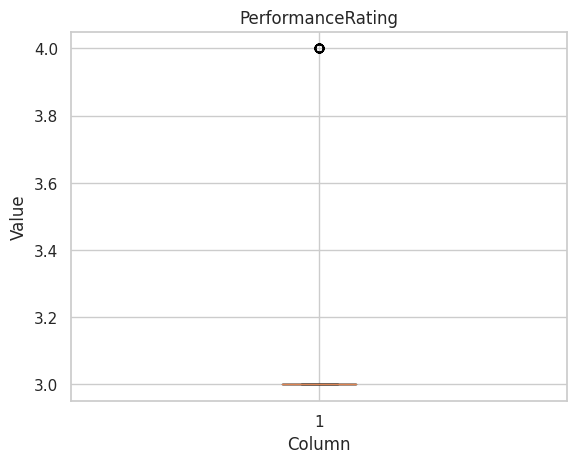

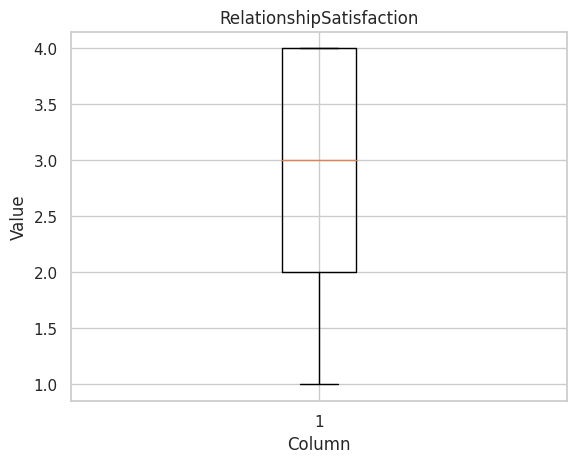

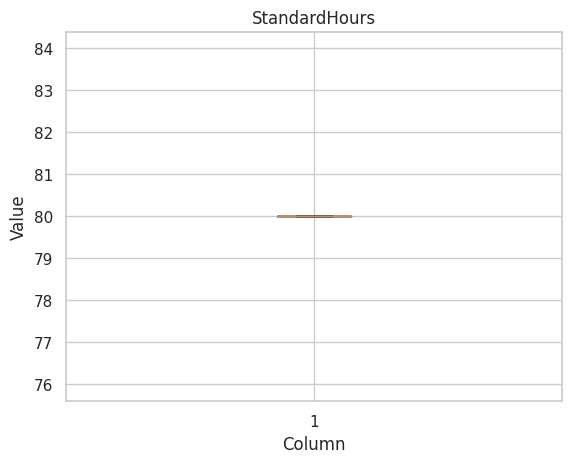

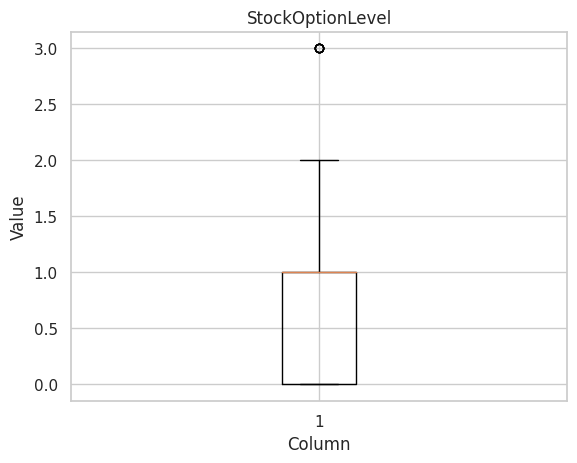

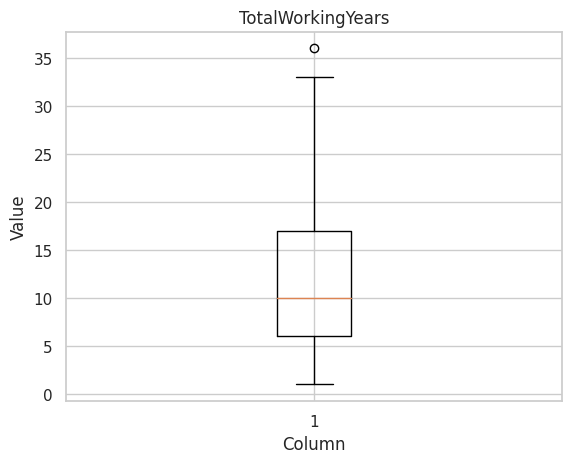

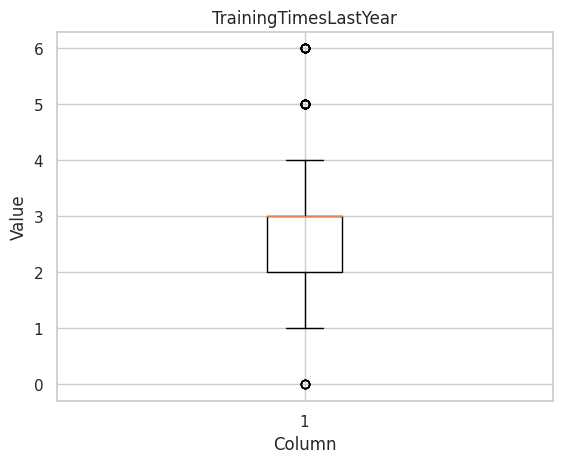

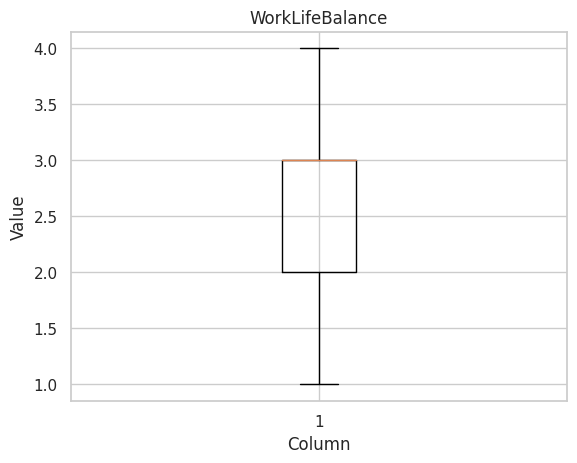

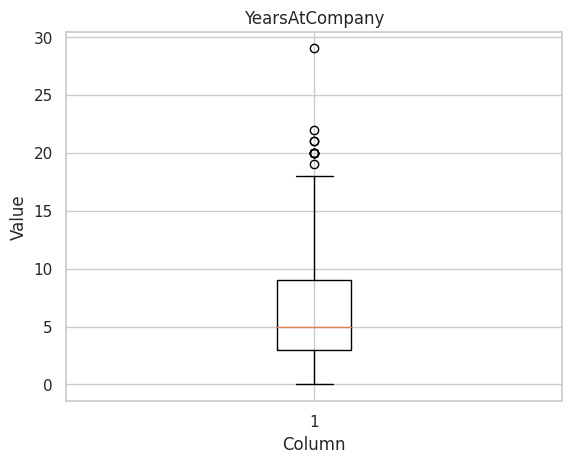

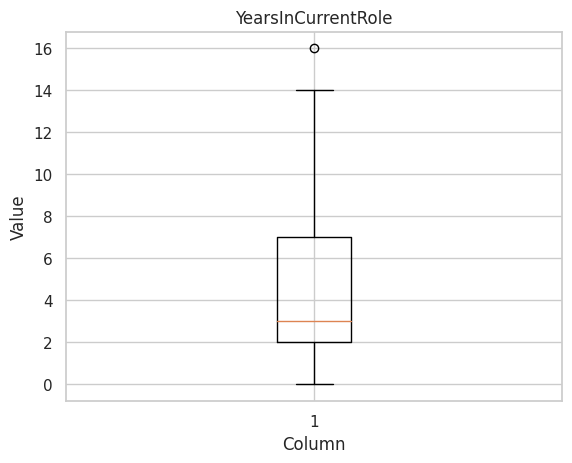

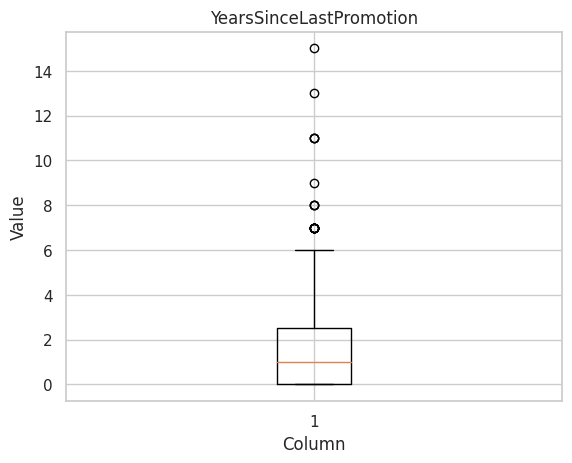

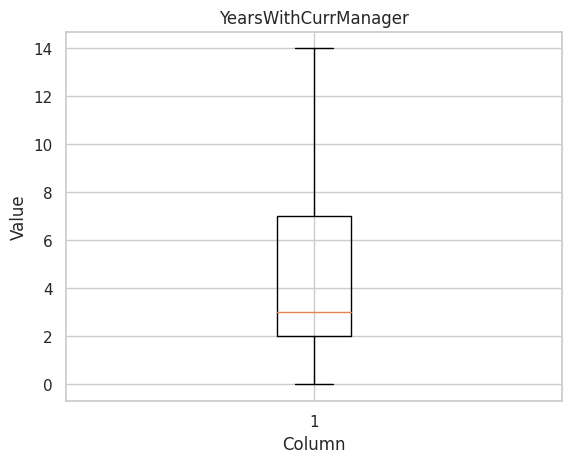

In [1247]:
for column in X_test.columns:
    if(np.issubdtype(X_test[column].dtype, np.number)):
        plt.figure()
        plt.boxplot(X_test[column])
        plt.title(column)
        plt.xlabel('Column')
        plt.ylabel('Value')
plt.show()

Conclusion:


---

*   for X_test all outliers seems to be realiable
*   Improbable values identified for columns: 'Age', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
* Due to the presence of management group in the dataset, values considered as outliers for the columns 'MonthlyIncome' were considered probable and left untransformed.


Premise:

---

*Columns 'EmployeeCount', 'Over18' and 'StandardHours' will be removed due to poor usability for the model (same values).
Unique value for column: Over18: ['Y']
Unique value for column: StandardHours:[80.]
Unique value for column: EmployeeCount:[1.]*

Checking the impact of outliers on the change of the median value of the entire set on the example of the 'Age' column

In [1248]:
# creation of outlieres variable column

outliers = train_DF[['Age', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany',
                                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [1249]:
#function for median calculation
def calculate_Median (data, column_name):
    median=np.median(data)
    print(f'{column_name}, median value: {median}')

In [1250]:
#calculation of median for each column in outliers
for column in outliers.columns:
    calculate_Median(outliers[column], column)

Age, median value: 36.0
DistanceFromHome, median value: 8.0
TotalWorkingYears, median value: 10.0
YearsAtCompany, median value: 5.0
YearsInCurrentRole, median value: 3.0
YearsSinceLastPromotion, median value: 1.0
YearsWithCurrManager, median value: 3.0


In [1251]:
# verification of value in column ['Age']
train_DF['Age'].describe()

count    3065.00000
mean      398.88385
std      1533.18331
min        18.00000
25%        30.00000
50%        36.00000
75%        45.00000
max      9890.00000
Name: Age, dtype: float64

In [1252]:
# creation of df with realistic age (realistic age assumed nas <=60)
df_with_real_age = train_DF.loc[train_DF['Age'] <= 60]

In [1253]:
#verification of median for realistic data (Age<=60)
df_with_real_age['Age'].describe()

count    2870.000000
mean       36.758188
std         9.149321
min        18.000000
25%        30.000000
50%        35.000000
75%        42.000000
max        60.000000
Name: Age, dtype: float64

Conclusion:

---


*the value of the median after rejecting outliers did not change significantly in relation to the median of the entire set. The median of the entire set = 36. (median for dataset with realistic age is 35) Since the percentage share of outliers in each of the columns listed in the 'outliers' frame is similar, the value of the median will also be assumed for the other columns. Due to the possibility of a logical error ('YearsAtCompany', 'YearsInCurrentRole') greater than 'Age' after replacing the outliers with the median.*


Premise:

---



---



*For the 'Age' column for outliers, the value 60 will be assumed as the upper, real limit.*

Below, code which was used during interpolation method verification

In [1254]:
# changing "outliers" in column ['Age'] by interpolation method;
# interpolation will be the best because almost of all data for outliers are the same value as the nearest one with the same JobRole
# Age column is treated separately because value of outliers differs from another outliers

# train_DF.loc[train_DF['Age'] > 60, 'Age'] = train_DF.loc[train_DF['Age'] > 60, 'Age'].interpolate()
# train_DF['Age'].describe()

In [1255]:
# creation of outlieres variable vithout "Age" column

# outliers_without_age = train_DF[['DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
#                                  'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [1256]:
# def outliers_removing (cols, dataFrame):
#     for col in cols:
#         dataFrame.loc[dataFrame[col] > 1000, col] = dataFrame.loc[dataFrame[col] > 1000, col].interpolate()

Interpolation appears to be inappropriate method due to the adjacency of the rows also containing outliers

In [1257]:
# Median value for "Age"
medianAge = np.median(train_DF['Age'])
medianAge

36.0

In [1258]:
medianAge_X_test = np.median(X_test['Age'])
medianAge_X_test

36.0

In [1259]:
# outliers removing from Age column by median method
train_DF.loc[train_DF['Age']>60, 'Age'] = medianAge

# for X_test medianAge from train_DF dataset will be used as same
X_test.loc[X_test['Age']>60, 'Age'] = medianAge

In [1260]:
train_DF['Age'].describe()

count    3065.000000
mean       36.709951
std         8.855327
min        18.000000
25%        30.000000
50%        36.000000
75%        42.000000
max        60.000000
Name: Age, dtype: float64

In [1261]:
X_test['Age'].describe()

count    147.000000
mean      37.619048
std        8.786145
min       19.000000
25%       31.000000
50%       36.000000
75%       43.500000
max       60.000000
Name: Age, dtype: float64

Replacing outliers for rest of columns without "Age" column

In [1262]:
outliers_without_age = train_DF[['DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                                 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [1263]:
# Function for exchanging outliers (except "Age") to median
def outliers_removing (cols, dataFrame):
    for col in cols:
        median = np.median(train_DF[col])
        """
        Pytanie - czemu tutaj mamy wartość "1000"?
        """
        dataFrame.loc[dataFrame[col] > 1000, col] = median

In [1264]:
outliers_removing(outliers_without_age, train_DF)
outliers_removing(outliers_without_age, X_test)

In [1265]:
# dataframe after outliers removing
train_DF.describe()

EmployeeNumber          Age    DailyRate  DistanceFromHome  \
count      3065.00000  3065.000000  3065.000000       3065.000000   
mean       4149.11876    36.709951   805.416313          8.999347   
std        2829.06042     8.855327   404.079910          7.763180   
min           1.00000    18.000000   102.000000          1.000000   
25%        1180.00000    30.000000   465.000000          2.000000   
50%        5366.00000    36.000000   805.000000          8.000000   
75%        6705.00000    42.000000  1167.000000         12.000000   
max        7977.00000    60.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  3065.000000         3065.0              3065.000000  3065.000000   
mean      2.898858            1.0                 2.721044    65.890375   
std       1.028422            0.0                 1.095399    20.334580   
min       1.000000            1.0                 1.000000    30.000000   
25%       2.000000            1.0                 2.000000    48.000000   
50%       3.000000            1.0                 3.000000    66.000000   
75%       4.000000            1.0                 4.000000    83.000000   
max       5.000000            1.0                 4.000000   100.000000   

       JobInvolvement     JobLevel  ...  RelationshipSatisfaction  \
count     3065.000000  3065.000000  ...               3065.000000   
mean         2.732463     2.057749  ...                  2.709625   
std          0.706788     1.106116  ...                  1.082372   
min          1.000000     1.000000  ...                  1.000000   
25%          2.000000     1.000000  ...                  2.000000   
50%          3.000000     2.000000  ...                  3.000000   
75%          3.000000     3.000000  ...                  4.000000   
max          4.000000     5.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         3065.0       3065.000000        3065.000000   
mean            80.0          0.799021          11.176509   
std              0.0          0.856971           7.567570   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          14.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            3065.000000      3065.000000     3065.000000   
mean                2.801305         2.759543        6.842414   
std                 1.289898         0.703354        5.905337   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         3065.000000              3065.000000           3065.000000  
mean             4.140946                 2.102773              4.039804  
std              3.503034                 3.128692              3.457837  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 2.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 26 columns]

In [1266]:
X_test.describe()

# outliers_without_age = train_DF[['DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
#                                  'YearsSinceLastPromotion', 'YearsWithCurrManager']]

EmployeeNumber         Age    DailyRate  DistanceFromHome   Education  \
count      147.000000  147.000000   147.000000        147.000000  147.000000   
mean    100073.000000   37.619048   806.115646          9.761905    3.000000   
std         42.579338    8.786145   405.476187          8.412591    0.986206   
min     100000.000000   19.000000   117.000000          1.000000    1.000000   
25%     100036.500000   31.000000   479.500000          2.500000    3.000000   
50%     100073.000000   36.000000   773.000000          8.000000    3.000000   
75%     100109.500000   43.500000  1163.000000         15.000000    4.000000   
max     100146.000000   60.000000  1499.000000         29.000000    5.000000   

       EmployeeCount  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count          147.0               147.000000  147.000000      147.000000   
mean             1.0                 2.707483   64.238095        2.680272   
std              0.0                 1.123905   19.640723        0.749305   
min              1.0                 1.000000   30.000000        1.000000   
25%              1.0                 2.000000   48.500000        2.000000   
50%              1.0                 3.000000   64.000000        3.000000   
75%              1.0                 4.000000   80.000000        3.000000   
max              1.0                 4.000000   99.000000        4.000000   

         JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  147.000000  ...                147.000000          147.0   
mean     2.108844  ...                  2.721088           80.0   
std      1.117294  ...                  1.115165            0.0   
min      1.000000  ...                  1.000000           80.0   
25%      1.000000  ...                  2.000000           80.0   
50%      2.000000  ...                  3.000000           80.0   
75%      3.000000  ...                  4.000000           80.0   
max      5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        147.000000         147.000000             147.000000   
mean           0.727891          11.612245               2.972789   
std            0.815583           7.457137               1.399342   
min            0.000000           1.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          17.000000               3.000000   
max            3.000000          36.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       147.000000      147.000000          147.000000   
mean          2.714286        6.829932            4.414966   
std           0.767490        5.414812            3.387818   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       29.000000           16.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               147.000000            147.000000  
mean                  2.095238              4.129252  
std                   2.977848              3.310987  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   2.500000              7.000000  
max                  15.000000             14.000000  

[8 rows x 26 columns]

Taking into accout that outliers are very simillar to surroundig rows, perhaps the best way will be deletion of rows with outliers value, but first the model will be traind on outliers replaced by median

In [1267]:
train_DF.columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [1268]:
columns_to_plot = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [1269]:
len(columns_to_plot)

31

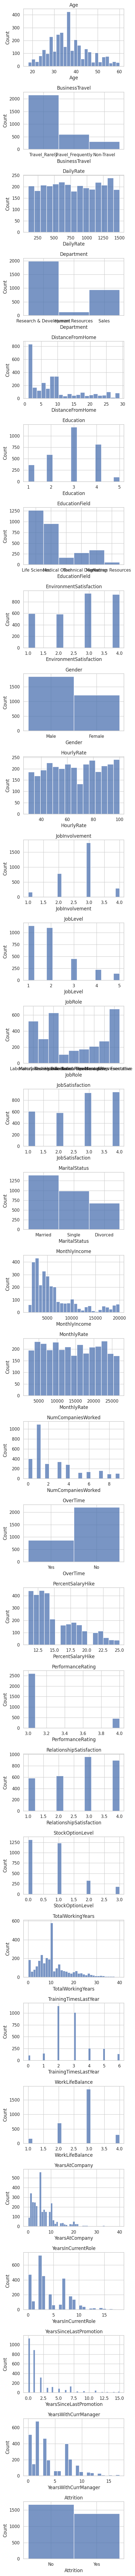

In [1270]:
# histograms for train_DF

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize = (5,3*len(columns_to_plot)))

for i, column in enumerate (columns_to_plot):
    sns.histplot(data=train_DF, x=column, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

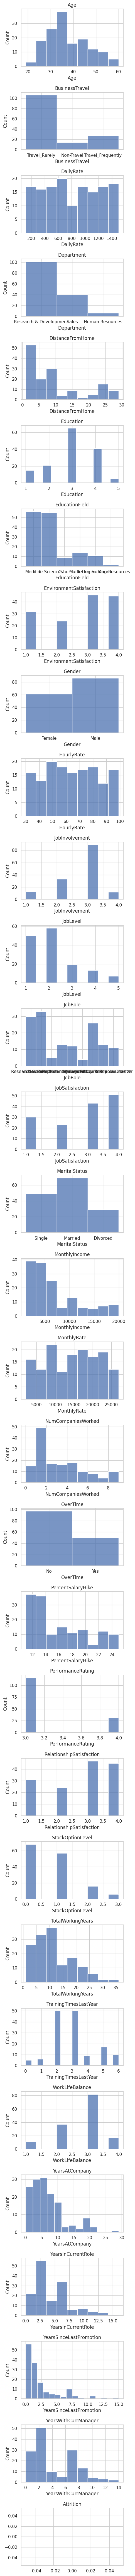

In [1271]:
# histograms for X_train

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize = (5,3*len(columns_to_plot)))

for i, column in enumerate (columns_to_plot):
    sns.histplot(data=X_test, x=column, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

f) Deletion of columns without any valuable data (one data for whole column)

In [1272]:
#X train dataframe

train_DF.drop(['EmployeeCount'], axis= 1, inplace=True)
train_DF.drop(['Over18'], axis=1, inplace=True)
train_DF.drop(['StandardHours'], axis=1, inplace=True)

# dataframe with data for testing

X_test.drop(['EmployeeCount'], axis= 1, inplace=True)
X_test.drop(['Over18'], axis=1, inplace=True)
X_test.drop(['StandardHours'], axis=1, inplace=True)

In [1273]:
train_DF.info()
# 3 column should be removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3065 entries, 0 to 4446
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            3065 non-null   int64  
 1   Age                       3065 non-null   float64
 2   BusinessTravel            3065 non-null   object 
 3   DailyRate                 3065 non-null   float64
 4   Department                3065 non-null   object 
 5   DistanceFromHome          3065 non-null   float64
 6   Education                 3065 non-null   float64
 7   EducationField            3065 non-null   object 
 8   EnvironmentSatisfaction   3065 non-null   float64
 9   Gender                    3065 non-null   object 
 10  HourlyRate                3065 non-null   float64
 11  JobInvolvement            3065 non-null   float64
 12  JobLevel                  3065 non-null   float64
 13  JobRole                   3065 non-null   object 
 14  JobSatis

In [1274]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1323 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            147 non-null    int64  
 1   Age                       147 non-null    float64
 2   BusinessTravel            147 non-null    object 
 3   DailyRate                 147 non-null    float64
 4   Department                147 non-null    object 
 5   DistanceFromHome          147 non-null    float64
 6   Education                 147 non-null    float64
 7   EducationField            147 non-null    object 
 8   EnvironmentSatisfaction   147 non-null    float64
 9   Gender                    147 non-null    object 
 10  HourlyRate                147 non-null    float64
 11  JobInvolvement            147 non-null    float64
 12  JobLevel                  147 non-null    float64
 13  JobRole                   147 non-null    object 
 14  JobSat

In [1275]:
X_test

EmployeeNumber   Age BusinessTravel  DailyRate              Department  \
1323          100000  35.0  Travel_Rarely     1343.0  Research & Development   
1324          100001  27.0  Travel_Rarely     1220.0  Research & Development   
1325          100002  24.0  Travel_Rarely     1476.0                   Sales   
1326          100003  37.0     Non-Travel      142.0                   Sales   
1327          100004  33.0  Travel_Rarely      527.0  Research & Development   
...              ...   ...            ...        ...                     ...   
1465          100142  35.0     Non-Travel      208.0  Research & Development   
1466          100143  41.0  Travel_Rarely      582.0  Research & Development   
1467          100144  42.0  Travel_Rarely     1396.0  Research & Development   
1468          100145  44.0  Travel_Rarely      621.0  Research & Development   
1469          100146  44.0     Non-Travel      381.0  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
1323              27.0        1.0        Medical                      3.0   
1324               5.0        3.0  Life Sciences                      3.0   
1325               4.0        1.0        Medical                      4.0   
1326               9.0        4.0        Medical                      1.0   
1327               1.0        4.0          Other                      4.0   
...                ...        ...            ...                      ...   
1465               8.0        4.0  Life Sciences                      3.0   
1466              28.0        4.0  Life Sciences                      1.0   
1467               6.0        3.0        Medical                      3.0   
1468              15.0        3.0        Medical                      1.0   
1469              24.0        3.0        Medical                      1.0   

      Gender  ...  RelationshipSatisfaction  StockOptionLevel  \
1323  Female  ...                       4.0               0.0   
1324  Female  ...                       2.0               0.0   
1325  Female  ...                       3.0               2.0   
1326    Male  ...                       4.0               1.0   
1327    Male  ...                       3.0               0.0   
...      ...  ...                       ...               ...   
1465  Female  ...                       4.0               1.0   
1466  Female  ...                       3.0               1.0   
1467    Male  ...                       2.0               1.0   
1468  Female  ...                       4.0               1.0   
1469    Male  ...                       3.0               0.0   

      TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
1323                6.0                   3.0              2.0            6.0   
1324                4.0                   2.0              2.0            4.0   
1325                5.0                   3.0              3.0            5.0   
1326                9.0                   6.0              3.0            9.0   
1327               10.0                   2.0              2.0           10.0   
...                 ...                   ...              ...            ...   
1465               15.0                   5.0              3.0           14.0   
1466               21.0                   3.0              3.0           20.0   
1467               18.0                   3.0              4.0           13.0   
1468               10.0                   2.0              3.0           10.0   
1469                9.0                   5.0              3.0            5.0   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1323                 5.0                      1.0                   1.0   
1324                 3.0                      1.0                   2.0   
1325                 4.0                      0.0                   3.0   
1326                 5.0                      7.0                 

### 7. Feature Engineering

a) Uniqe value to be modified

In [1276]:
# Wypisanie wszystkich unikalnych wartości z poszczególnych kolumn
for column in train_DF.columns:

    unique_values = train_DF[column].unique()

    print(f"Unikalne wartości dla kolumny {column}:")

    print(unique_values)

    print()

Unikalne wartości dla kolumny EmployeeNumber:
[ 104 1638  164 ... 7973 7974 7977]

Unikalne wartości dla kolumny Age:
[30. 38. 26. 28. 35. 34. 32. 42. 40. 48. 39. 18. 43. 21. 53. 45. 29. 33.
 41. 24. 37. 50. 36. 52. 47. 31. 49. 54. 44. 22. 46. 27. 55. 59. 25. 23.
 56. 20. 60. 51. 58. 19. 57.]

Unikalne wartości dla kolumny BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unikalne wartości dla kolumny DailyRate:
[ 852.  397.  841. 1117.  464. 1107. 1018.  269.  296.  989.  855. 1181.
  895.  827.  977.  544.  244.  995. 1343. 1282.  153.  280.  404. 1265.
  252. 1496.  306.  128.  529.  553.  572.  482.  471.  509.  130.  506.
  329.  367. 1219.  746. 1322.  969. 1271. 1158.  688.  319.  371. 1336.
  107.  448.  359.  625. 1017.  835. 1050.  523. 1064. 1128.  928. 1319.
  932.  809. 1376.  253.  336.  884. 1385.  945.  118. 1231.  426.  737.
 1442.  853.  557.  377.  616. 1398. 1138.  531.  138. 1377. 1240. 1400.
 1001. 1082. 1171.  136.  218.  452. 1397. 1192.  944. 

b) Simple replacement

Unique values for chosen column

In [1277]:
columns_to_encode = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']

#becasue of column "Attition" in X_test has NaN, incoding is not necessary and this column will be omitted
columns_to_encode_X = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [1278]:

unique_values_train_DF = train_DF[columns_to_encode].apply(lambda x: x.unique()).to_dict()
unique_values_train_DF

{'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object),
 'Department': array(['Research & Development', 'Human Resources', 'Sales'], dtype=object),
 'EducationField': array(['Life Sciences', 'Medical', 'Other', 'Technical Degree',
        'Marketing', 'Human Resources'], dtype=object),
 'Gender': array(['Male', 'Female'], dtype=object),
 'JobRole': array(['Laboratory Technician', 'Manufacturing Director',
        'Research Scientist', 'Human Resources', 'Research Director',
        'Sales Representative', 'Manager', 'Healthcare Representative',
        'Sales Executive'], dtype=object),
 'MaritalStatus': array(['Married', 'Single', 'Divorced'], dtype=object),
 'OverTime': array(['Yes', 'No'], dtype=object),
 'Attrition': array(['No', 'Yes'], dtype=object)}

In [1279]:
unique_values_X_test = X_test[columns_to_encode_X].apply(lambda x: x.unique()).to_dict()
unique_values_X_test

{'BusinessTravel': array(['Travel_Rarely', 'Non-Travel', 'Travel_Frequently'], dtype=object),
 'Department': array(['Research & Development', 'Sales', 'Human Resources'], dtype=object),
 'EducationField': array(['Medical', 'Life Sciences', 'Other', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'JobRole': array(['Research Scientist', 'Sales Executive', 'Sales Representative',
        'Manufacturing Director', 'Manager', 'Human Resources',
        'Laboratory Technician', 'Healthcare Representative',
        'Research Director'], dtype=object),
 'MaritalStatus': array(['Single', 'Married', 'Divorced'], dtype=object),
 'OverTime': array(['No', 'Yes'], dtype=object)}

In [1280]:
# unique_values_train_DF.to_csv('/Users/Agnieszka/.git/Klasyfikacja/uniqe_values_train_DF.csv', index=True)

In [1281]:
def encode_categorical_columns(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].unique()
        mapping = {value: i for i, value in enumerate(unique_values)}
        dataframe[column] = dataframe[column].map(mapping)
    return dataframe

In [1282]:
encoded_DF = encode_categorical_columns(train_DF, columns_to_encode)
encoded_DF

EmployeeNumber   Age  BusinessTravel  DailyRate  Department  \
0                104  30.0               0      852.0           0   
1               1638  38.0               0      397.0           0   
2                164  26.0               0      841.0           0   
3                395  28.0               0     1117.0           0   
4                 53  35.0               0      464.0           0   
...              ...   ...             ...        ...         ...   
4438            7969  41.0               0      582.0           0   
4440            7971  42.0               0     1396.0           0   
4442            7973  42.0               0     1396.0           0   
4443            7974  36.0               0      621.0           0   
4446            7977  44.0               2      381.0           0   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0                  1.0        1.0               0                      4.0   
1                  2.0        2.0               1                      4.0   
2                  6.0        3.0               2                      3.0   
3                  8.0        2.0               0                      4.0   
4                  4.0        2.0               2                      3.0   
...                ...        ...             ...                      ...   
4438              28.0        4.0               0                      1.0   
4440               6.0        3.0               1                      3.0   
4442               6.0        3.0               1                      3.0   
4443              15.0        3.0               1                      1.0   
4446               8.0        3.0               1                      1.0   

      Gender  ...  RelationshipSatisfaction  StockOptionLevel  \
0          0  ...                       3.0               2.0   
1          1  ...                       4.0               1.0   
2          1  ...                       3.0               0.0   
3          1  ...                       4.0               0.0   
4          0  ...                       3.0               1.0   
...      ...  ...                       ...               ...   
4438       1  ...                       3.0               1.0   
4440       0  ...                       2.0               1.0   
4442       0  ...                       2.0               1.0   
4443       1  ...                       4.0               1.0   
4446       0  ...                       3.0               0.0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                  10.0                    1.0              2.0   
1                  10.0                    6.0              4.0   
2                   5.0                    3.0              2.0   
3                   5.0                    3.0              3.0   
4                   1.0                    3.0              3.0   
...                 ...                    ...              ...   
4438               21.0                    3.0              3.0   
4440               10.0                    3.0              4.0   
4442               10.0                    3.0              4.0   
4443               10.0                    2.0              3.0   
4446                9.0                    5.0              3.0   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               10.0                 8.0                      3.0   
1                5.0                 4.0                      0.0   
2                5.0                 4.0                      4.0   
3                5.0                 3.0                      0.0   
4                1.0                 0.0                      0.0   
...              ...                 ...                      ...   
4438            20.0                 3.0                      0.0   
4440            13.0                 7.0                      5.0   
4442            13.0             

In [1283]:
encoded_DF_X = encode_categorical_columns(X_test, columns_to_encode_X)
encoded_DF_X

EmployeeNumber   Age  BusinessTravel  DailyRate  Department  \
1323          100000  35.0               0     1343.0           0   
1324          100001  27.0               0     1220.0           0   
1325          100002  24.0               0     1476.0           1   
1326          100003  37.0               1      142.0           1   
1327          100004  33.0               0      527.0           0   
...              ...   ...             ...        ...         ...   
1465          100142  35.0               1      208.0           0   
1466          100143  41.0               0      582.0           0   
1467          100144  42.0               0     1396.0           0   
1468          100145  44.0               0      621.0           0   
1469          100146  44.0               1      381.0           0   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
1323              27.0        1.0               0                      3.0   
1324               5.0        3.0               1                      3.0   
1325               4.0        1.0               0                      4.0   
1326               9.0        4.0               0                      1.0   
1327               1.0        4.0               2                      4.0   
...                ...        ...             ...                      ...   
1465               8.0        4.0               1                      3.0   
1466              28.0        4.0               1                      1.0   
1467               6.0        3.0               0                      3.0   
1468              15.0        3.0               0                      1.0   
1469              24.0        3.0               0                      1.0   

      Gender  ...  RelationshipSatisfaction  StockOptionLevel  \
1323       0  ...                       4.0               0.0   
1324       0  ...                       2.0               0.0   
1325       0  ...                       3.0               2.0   
1326       1  ...                       4.0               1.0   
1327       1  ...                       3.0               0.0   
...      ...  ...                       ...               ...   
1465       0  ...                       4.0               1.0   
1466       0  ...                       3.0               1.0   
1467       1  ...                       2.0               1.0   
1468       0  ...                       4.0               1.0   
1469       1  ...                       3.0               0.0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
1323                6.0                    3.0              2.0   
1324                4.0                    2.0              2.0   
1325                5.0                    3.0              3.0   
1326                9.0                    6.0              3.0   
1327               10.0                    2.0              2.0   
...                 ...                    ...              ...   
1465               15.0                    5.0              3.0   
1466               21.0                    3.0              3.0   
1467               18.0                    3.0              4.0   
1468               10.0                    2.0              3.0   
1469                9.0                    5.0              3.0   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
1323             6.0                 5.0                      1.0   
1324             4.0                 3.0                      1.0   
1325             5.0                 4.0                      0.0   
1326             9.0                 5.0                      7.0   
1327            10.0                 9.0                      7.0   
...              ...                 ...                      ...   
1465            14.0                11.0                      2.0   
1466            20.0                 7.0                      0.0   
1467            13.0             

In [1284]:
encoded_DF_X

EmployeeNumber   Age  BusinessTravel  DailyRate  Department  \
1323          100000  35.0               0     1343.0           0   
1324          100001  27.0               0     1220.0           0   
1325          100002  24.0               0     1476.0           1   
1326          100003  37.0               1      142.0           1   
1327          100004  33.0               0      527.0           0   
...              ...   ...             ...        ...         ...   
1465          100142  35.0               1      208.0           0   
1466          100143  41.0               0      582.0           0   
1467          100144  42.0               0     1396.0           0   
1468          100145  44.0               0      621.0           0   
1469          100146  44.0               1      381.0           0   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
1323              27.0        1.0               0                      3.0   
1324               5.0        3.0               1                      3.0   
1325               4.0        1.0               0                      4.0   
1326               9.0        4.0               0                      1.0   
1327               1.0        4.0               2                      4.0   
...                ...        ...             ...                      ...   
1465               8.0        4.0               1                      3.0   
1466              28.0        4.0               1                      1.0   
1467               6.0        3.0               0                      3.0   
1468              15.0        3.0               0                      1.0   
1469              24.0        3.0               0                      1.0   

      Gender  ...  RelationshipSatisfaction  StockOptionLevel  \
1323       0  ...                       4.0               0.0   
1324       0  ...                       2.0               0.0   
1325       0  ...                       3.0               2.0   
1326       1  ...                       4.0               1.0   
1327       1  ...                       3.0               0.0   
...      ...  ...                       ...               ...   
1465       0  ...                       4.0               1.0   
1466       0  ...                       3.0               1.0   
1467       1  ...                       2.0               1.0   
1468       0  ...                       4.0               1.0   
1469       1  ...                       3.0               0.0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
1323                6.0                    3.0              2.0   
1324                4.0                    2.0              2.0   
1325                5.0                    3.0              3.0   
1326                9.0                    6.0              3.0   
1327               10.0                    2.0              2.0   
...                 ...                    ...              ...   
1465               15.0                    5.0              3.0   
1466               21.0                    3.0              3.0   
1467               18.0                    3.0              4.0   
1468               10.0                    2.0              3.0   
1469                9.0                    5.0              3.0   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
1323             6.0                 5.0                      1.0   
1324             4.0                 3.0                      1.0   
1325             5.0                 4.0                      0.0   
1326             9.0                 5.0                      7.0   
1327            10.0                 9.0                      7.0   
...              ...                 ...                      ...   
1465            14.0                11.0                      2.0   
1466            20.0                 7.0                      0.0   
1467            13.0             

In [1285]:
unique_values_after_encoding = train_DF[columns_to_encode].apply(lambda x: x.unique()).to_dict()
unique_values_after_encoding

{'BusinessTravel': array([0, 1, 2]),
 'Department': array([0, 1, 2]),
 'EducationField': array([0, 1, 2, 3, 4, 5]),
 'Gender': array([0, 1]),
 'JobRole': array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 'MaritalStatus': array([0, 1, 2]),
 'OverTime': array([0, 1]),
 'Attrition': array([0, 1])}

In [1286]:
unique_values_after_encoding_X = X_test[columns_to_encode].apply(lambda x: x.unique()).to_dict()
unique_values_after_encoding_X

{'BusinessTravel': array([0, 1, 2]),
 'Department': array([0, 1, 2]),
 'EducationField': array([0, 1, 2, 3, 4, 5]),
 'Gender': array([0, 1]),
 'JobRole': array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 'MaritalStatus': array([0, 1, 2]),
 'OverTime': array([0, 1]),
 'Attrition': array([nan], dtype=object)}

c) Data discretization

First histogram will be show for train_DF and X_train dataset to compare and control if previous data manipulation
has been done properly.

Discretization will be performed first for train_DF than for X_test


*   Age column data discretization


<Axes: >

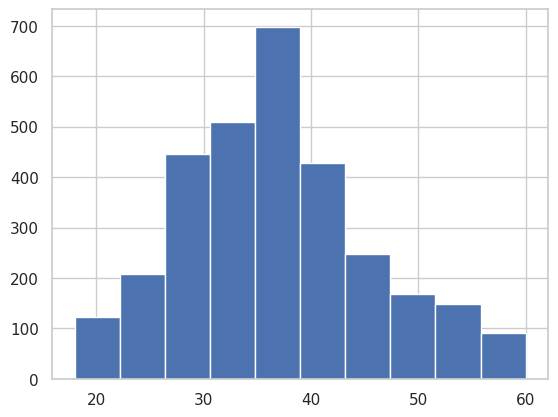

In [1287]:
train_DF['Age'].hist()

In [1288]:
max_Age = train_DF.loc[train_DF['Age']>50]
max_Age

EmployeeNumber   Age  BusinessTravel  DailyRate  Department  \
20                32  53.0               0     1282.0           0   
48               543  52.0               0      319.0           0   
61               450  54.0               1      928.0           0   
88              1070  54.0               0     1082.0           2   
92               374  55.0               0      452.0           0   
...              ...   ...             ...        ...         ...   
4349            7880  60.0               1     1499.0           2   
4363            7894  51.0               0     1302.0           0   
4382            7913  54.0               0      584.0           0   
4431            7962  55.0               0      725.0           0   
4432            7963  55.0               0      725.0           0   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
20                 5.0        3.0               2                      3.0   
48                 3.0        3.0               1                      4.0   
61                20.0        4.0               0                      4.0   
88                 2.0        4.0               0                      3.0   
92                 1.0        3.0               1                      4.0   
...                ...        ...             ...                      ...   
4349              28.0        3.0               4                      3.0   
4363               2.0        3.0               1                      4.0   
4382              22.0        5.0               1                      2.0   
4431               2.0        3.0               1                      4.0   
4432               2.0        3.0               1                      4.0   

      Gender  ...  RelationshipSatisfaction  StockOptionLevel  \
20         1  ...                       4.0               1.0   
48         0  ...                       3.0               0.0   
61         1  ...                       4.0               0.0   
88         1  ...                       2.0               1.0   
92         0  ...                       3.0               0.0   
...      ...  ...                       ...               ...   
4349       1  ...                       4.0               0.0   
4363       0  ...                       4.0               1.0   
4382       1  ...                       3.0               1.0   
4431       0  ...                       4.0               1.0   
4432       0  ...                       4.0               1.0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
20                 26.0                    3.0              2.0   
48                 28.0                    4.0              3.0   
61                 20.0                    4.0              2.0   
88                 13.0                    4.0              3.0   
92                 37.0                    2.0              3.0   
...                 ...                    ...              ...   
4349               22.0                    5.0              4.0   
4363               13.0                    3.0              3.0   
4382               36.0                    6.0              3.0   
4431               24.0                    2.0              3.0   
4432               24.0                    2.0              3.0   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
20              14.0                13.0                      4.0   
48               5.0                 4.0                      0.0   
61               4.0                 3.0                      0.0   
88               9.0                 4.0                      7.0   
92              36.0                10.0                      4.0   
...              ...                 ...                      ...   
4349            18.0                13.0                     13.0   
4363             4.0                 1.0                      1.0   
4382            10.0             

In [1289]:
max_Age = train_DF.loc[train_DF['Age']>60]
max_Age

Empty DataFrame
Columns: [EmployeeNumber, Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition]
Index: []

[0 rows x 32 columns]

In [1290]:
# age division into bins for training and test data

train_DF['Age_Bin'] = pd.cut(train_DF.Age, labels=['17-30', '31-45', '46-60'], bins=[17, 30, 45, 60])

X_test['Age_Bin'] = pd.cut(X_test.Age, labels=['17-30', '31-45', '46-60'], bins=[17, 30, 45, 60])

In [1291]:
train_DF.head(5)

EmployeeNumber   Age  BusinessTravel  DailyRate  Department  \
0             104  30.0               0      852.0           0   
1            1638  38.0               0      397.0           0   
2             164  26.0               0      841.0           0   
3             395  28.0               0     1117.0           0   
4              53  35.0               0      464.0           0   

   DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0               1.0        1.0               0                      4.0   
1               2.0        2.0               1                      4.0   
2               6.0        3.0               2                      3.0   
3               8.0        2.0               0                      4.0   
4               4.0        2.0               2                      3.0   

   Gender  ...  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0       0  ...               2.0               10.0                    1.0   
1       1  ...               1.0               10.0                    6.0   
2       1  ...               0.0                5.0                    3.0   
3       1  ...               0.0                5.0                    3.0   
4       0  ...               1.0                1.0                    3.0   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0              2.0            10.0                 8.0   
1              4.0             5.0                 4.0   
2              2.0             5.0                 4.0   
3              3.0             5.0                 3.0   
4              3.0             1.0                 0.0   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  Age_Bin  
0                      3.0                   0.0          0    17-30  
1                      0.0                   2.0          0    31-45  
2                      4.0                   3.0          0    17-30  
3                      0.0                   2.0          0    17-30  
4                      0.0                   0.0          0    31-45  

[5 rows x 33 columns]

In [1292]:
#Age conversion from bins to numeric for train_DF


unique_age_bin = tuple(train_DF.Age_Bin.unique())

train_DF['Age_Bin'].replace(unique_age_bin, range(len(unique_age_bin)), inplace=True)
train_DF.drop('Age', axis=1, inplace=True)



In [1293]:
#Age conversion from bins to numeric for X_test
unique_age_bin_X = tuple(X_test.Age_Bin.unique())
X_test['Age_Bin'].replace(unique_age_bin_X, range(len(unique_age_bin_X)), inplace=True)
X_test.drop('Age', axis=1, inplace=True)


In [1294]:
train_DF['Age_Bin'].describe()

count     3065
unique       3
top          1
freq      1770
Name: Age_Bin, dtype: int64

In [1295]:
X_test['Age_Bin'].describe()

count     147
unique      3
top         0
freq       86
Name: Age_Bin, dtype: int64

* Data discretization for rest columns



<Axes: >

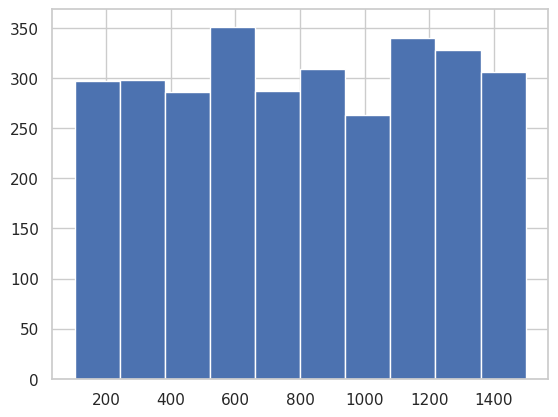

In [1296]:
train_DF['DailyRate'].hist()

<Axes: >

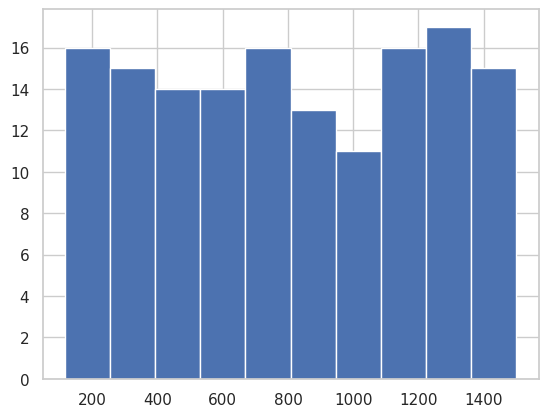

In [1297]:
X_test['DailyRate'].hist()

In [1298]:
daily_rate = train_DF["DailyRate"]
categories = pd.qcut(daily_rate, q=5, labels=False)
train_DF["DailyRate"] = categories


daily_rateX = X_test["DailyRate"]
categoriesX = pd.qcut(daily_rateX, q=5, labels=False)
X_test["DailyRate"] = categoriesX

<Axes: >

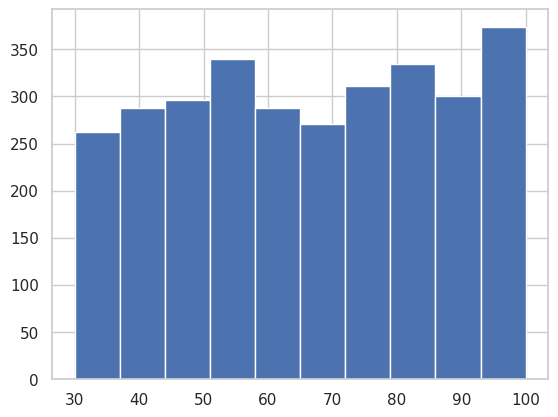

In [1299]:
train_DF['HourlyRate'].hist()

<Axes: >

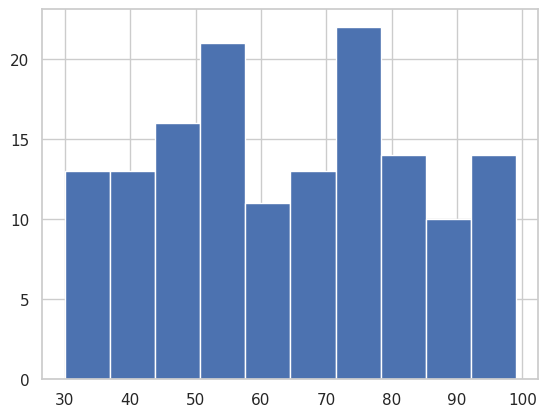

In [1300]:
X_test['HourlyRate'].hist()

In [1301]:
HourlyRate = train_DF["HourlyRate"]
categories = pd.qcut(HourlyRate, q=5, labels=False)
train_DF["HourlyRate"] = categories

HourlyRateX = X_test["HourlyRate"]
categoriesX = pd.qcut(HourlyRateX, q=5, labels=False)
X_test["HourlyRate"] = categoriesX

<Axes: >

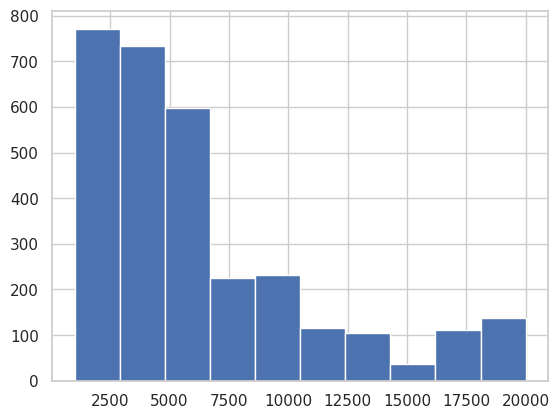

In [1302]:
train_DF['MonthlyIncome'].hist()

<Axes: >

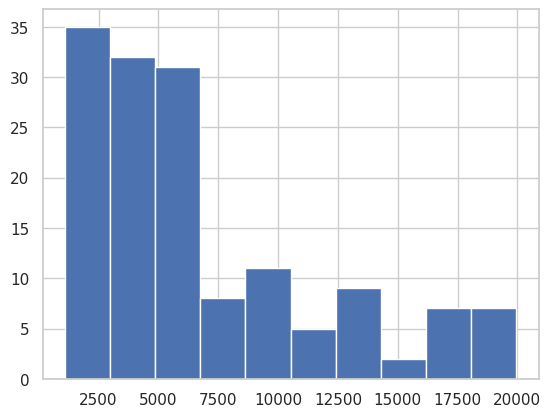

In [1303]:
X_test['MonthlyIncome'].hist()

In [1304]:
MonthlyIncome = train_DF["MonthlyIncome"]
categories = pd.qcut(MonthlyIncome, q=5, labels=False)
train_DF["MonthlyIncome"] = categories


MonthlyIncomeX = X_test["MonthlyIncome"]
categoriesX = pd.qcut(MonthlyIncomeX, q=5, labels=False)
X_test["MonthlyIncome"] = categoriesX

<Axes: >

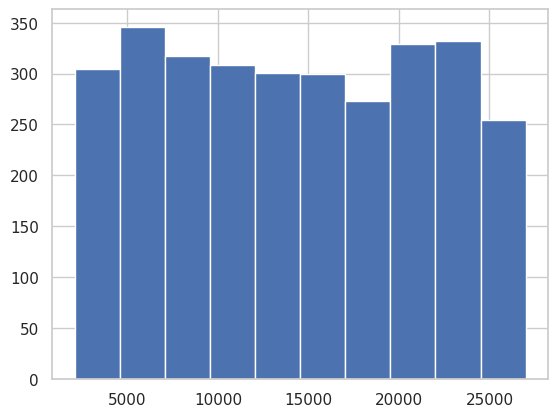

In [1305]:
train_DF['MonthlyRate'].hist()

<Axes: >

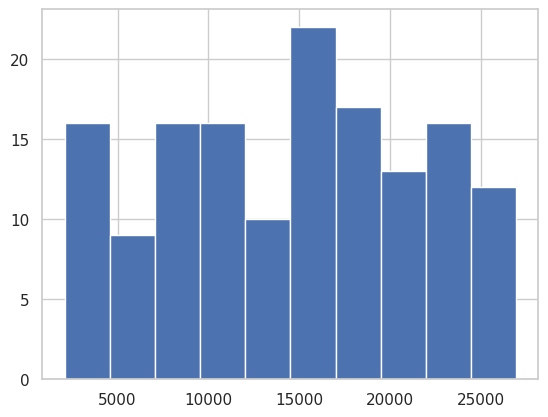

In [1306]:
X_test['MonthlyRate'].hist()

In [1307]:
MonthlyRate = train_DF["MonthlyRate"]
categories = pd.qcut(MonthlyRate, q=5, labels=False)
train_DF["MonthlyRate"] = categories


MonthlyRateX = X_test["MonthlyRate"]
categoriesX = pd.qcut(MonthlyRateX, q=5, labels=False)
X_test["MonthlyRate"] = categoriesX


<Axes: >

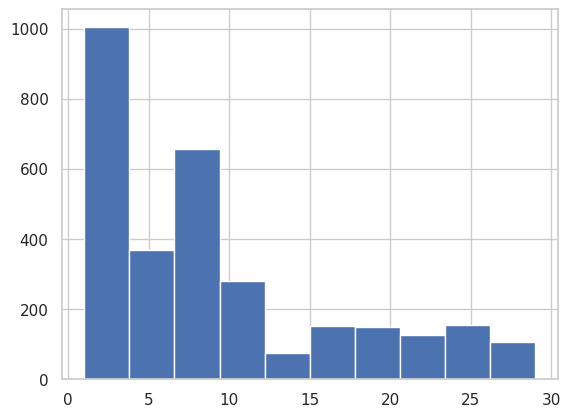

In [1308]:
train_DF['DistanceFromHome'].hist()

<Axes: >

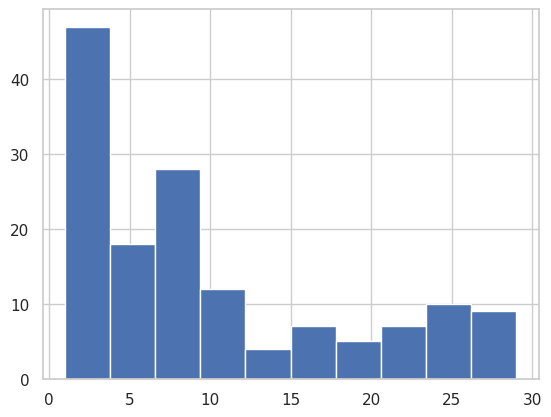

In [1309]:
X_test['DistanceFromHome'].hist()

In [1310]:
DistanceFromHome = train_DF["DistanceFromHome"]
categories = pd.qcut(DistanceFromHome, q=5, labels=False)
train_DF["DistanceFromHome"] = categories

DistanceFromHomeX = X_test["DistanceFromHome"]
categoriesX = pd.qcut(DistanceFromHomeX, q=5, labels=False)
X_test["DistanceFromHome"] = categoriesX

<Axes: >

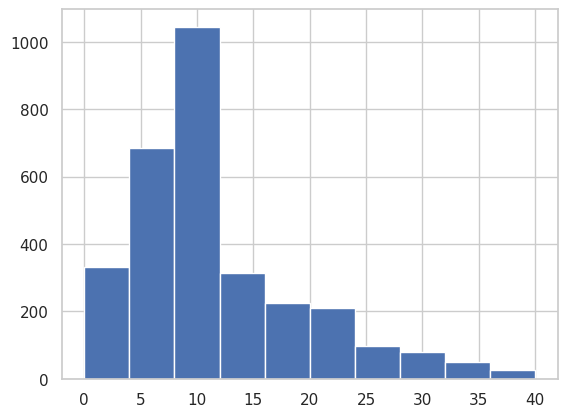

In [1311]:
train_DF['TotalWorkingYears'].hist()

<Axes: >

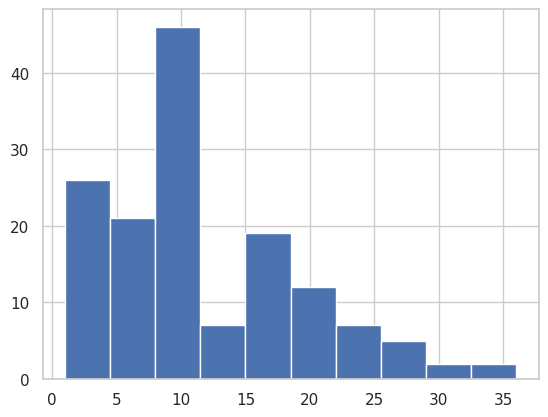

In [1312]:
X_test['TotalWorkingYears'].hist()

In [1313]:
TotalWorkingYears = train_DF["TotalWorkingYears"]
categories = pd.qcut(TotalWorkingYears, q=5, labels=False)
train_DF["TotalWorkingYears"] = categories

TotalWorkingYearsX = X_test["TotalWorkingYears"]
categoriesX = pd.qcut(TotalWorkingYearsX, q=5, labels=False)
X_test["TotalWorkingYears"] = categoriesX

<Axes: >

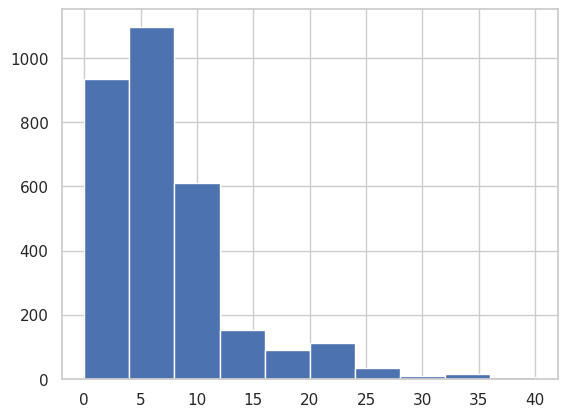

In [1314]:
train_DF['YearsAtCompany'].hist()

<Axes: >

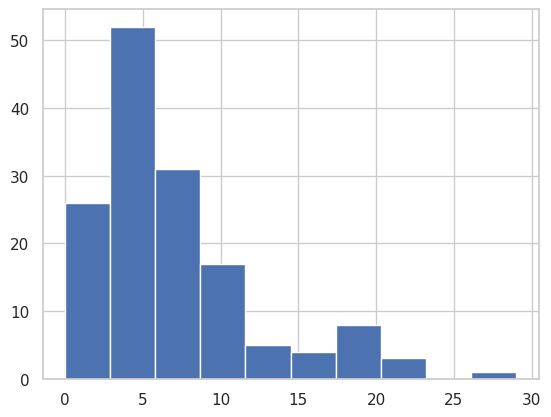

In [1315]:
X_test['YearsAtCompany'].hist()

In [1316]:
YearsAtCompany = train_DF["YearsAtCompany"]
categories = pd.qcut(YearsAtCompany, q=5, labels=False)
train_DF["YearsAtCompany"] = categories

YearsAtCompanyX = X_test["YearsAtCompany"]
categoriesX = pd.qcut(YearsAtCompanyX, q=5, labels=False)
X_test["YearsAtCompany"] = categoriesX

In [1317]:
train_DF.head(30)

EmployeeNumber  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0              104               0          2           0                 0   
1             1638               0          1           0                 0   
2              164               0          2           0                 2   
3              395               0          3           0                 2   
4               53               0          1           0                 1   
5             1467               0          3           1                 3   
6              727               0          3           0                 1   
7              351               0          0           0                 0   
8              555               1          0           2                 2   
9              253               0          3           0                 1   
10            1363               0          2           0                 1   
11            1799               0          3           0                 0   
12              42               0          2           2                 1   
13             724               0          2           0                 0   
14            1671               0          3           0                 0   
15            1624               1          1           2                 1   
16            1778               0          0           1                 0   
17             930               0          3           0                 3   
18             514               1          1           0                 1   
19             669               0          4           2                 4   
20              32               0          4           0                 1   
21            1015               0          0           0                 2   
22            1858               2          0           1                 0   
23            1383               0          1           0                 0   
24             894               0          4           0                 1   
25             336               0          0           0                 0   
26             208               2          4           0                 0   
27             684               1          0           2                 4   
28             362               0          0           0                 0   
29             364               0          1           0                 0   

    Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0         1.0               0                      4.0       0           1   
1         2.0               1                      4.0       1           1   
2         3.0               2                      3.0       1           1   
3         2.0               0                      4.0       1           2   
4         2.0               2                      3.0       0           3   
5         4.0               3                      1.0       1           1   
6         2.0               0                      3.0       1           0   
7         3.0               1                      4.0       1           1   
8         2.0               4                      4.0       1           0   
9         1.0               1                      4.0       1           1   
10        3.0               0                      4.0       0           1   
11        3.0               0                      3.0       0           3   
12        3.0               3                      4.0       0           1   
13        4.0               0                      2.0       1           0   
14        3.0               1                      4.0       0           0   
15        2.0               1                      2.0       1           2   
16        3.0               0                      2.0       0           4   
17        3.0               1                      3.0       1           3   
18        3.0               3                      3.0       0          

In [1318]:
X_test.head(30)

EmployeeNumber  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1323          100000               0          4           0                 4   
1324          100001               0          3           0                 1   
1325          100002               0          4           1                 1   
1326          100003               1          0           1                 2   
1327          100004               0          1           0                 0   
1328          100005               0          2           1                 0   
1329          100006               2          2           1                 4   
1330          100007               0          4           1                 3   
1331          100008               0          4           0                 4   
1332          100009               0          2           0                 1   
1333          100010               0          0           0                 2   
1334          100011               0          1           2                 0   
1335          100012               0          2           0                 4   
1336          100013               0          4           0                 0   
1337          100014               0          3           2                 2   
1338          100015               0          0           0                 4   
1339          100016               2          0           1                 2   
1340          100017               0          1           0                 1   
1341          100018               0          3           0                 0   
1342          100019               1          0           0                 2   
1343          100020               0          3           0                 0   
1344          100021               2          4           0                 0   
1345          100022               0          2           0                 4   
1346          100023               1          1           1                 0   
1347          100024               2          0           0                 2   
1348          100025               0          4           0                 1   
1349          100026               2          2           0                 2   
1350          100027               2          4           1                 0   
1351          100028               0          3           1                 2   
1352          100029               0          3           0                 2   

      Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
1323        1.0               0                      3.0       0           1   
1324        3.0               1                      3.0       0           4   
1325        1.0               0                      4.0       0           0   
1326        4.0               0                      1.0       1           2   
1327        4.0               2                      4.0       1           2   
1328        4.0               3                      2.0       0           3   
1329        3.0               1                      3.0       1           3   
1330        1.0               1                      4.0       1           4   
1331        4.0               1                      4.0       1           1   
1332        4.0               4                      4.0       0           4   
1333        3.0               1                      1.0       0           0   
1334        1.0               4                      3.0       1           1   
1335        3.0               1                      4.0       1           4   
1336        2.0               2                      4.0       1           4   
1337        2.0               0                      2.0       1           2   
1338        2.0               1                      3.0       1           3   
1339        3.0               1                      4.0       1           3   
1340        4.0               2                      2

In [1319]:
train_DF.describe()

EmployeeNumber  BusinessTravel   DailyRate   Department  \
count      3065.00000     3065.000000  3065.00000  3065.000000   
mean       4149.11876        0.397064     1.99739     0.655791   
std        2829.06042        0.666176     1.41398     0.915464   
min           1.00000        0.000000     0.00000     0.000000   
25%        1180.00000        0.000000     1.00000     0.000000   
50%        5366.00000        0.000000     2.00000     0.000000   
75%        6705.00000        1.000000     3.00000     2.000000   
max        7977.00000        2.000000     4.00000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       3065.000000  3065.000000     3065.000000              3065.000000   
mean           1.895922     2.898858        1.234910                 2.721044   
std            1.472972     1.028422        1.445582                 1.095399   
min            0.000000     1.000000        0.000000                 1.000000   
25%            0.000000     2.000000        0.000000                 2.000000   
50%            2.000000     3.000000        1.000000                 3.000000   
75%            3.000000     4.000000        2.000000                 4.000000   
max            4.000000     5.000000        5.000000                 4.000000   

            Gender   HourlyRate  ...  RelationshipSatisfaction  \
count  3065.000000  3065.000000  ...               3065.000000   
mean      0.396411     1.963785  ...                  2.709625   
std       0.489231     1.409935  ...                  1.082372   
min       0.000000     0.000000  ...                  1.000000   
25%       0.000000     1.000000  ...                  2.000000   
50%       0.000000     2.000000  ...                  3.000000   
75%       1.000000     3.000000  ...                  4.000000   
max       1.000000     4.000000  ...                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       3065.000000        3065.000000            3065.000000   
mean           0.799021           1.924959               2.801305   
std            0.856971           1.379487               1.289898   
min            0.000000           0.000000               0.000000   
25%            0.000000           1.000000               2.000000   
50%            1.000000           2.000000               3.000000   
75%            1.000000           3.000000               3.000000   
max            3.000000           4.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      3065.000000     3065.000000         3065.000000   
mean          2.759543        1.770636            4.140946   
std           0.703354        1.430249            3.503034   
min           1.000000        0.000000            0.000000   
25%           2.000000        1.000000            2.000000   
50%           3.000000        1.000000            3.000000   
75%           3.000000        3.000000            7.000000   
max           4.000000        4.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager    Attrition  
count              3065.000000           3065.000000  3065.000000  
mean                  2.102773              4.039804     0.454486  
std                   3.128692              3.457837     0.498005  
min                   0.000000              0.000000     0.000000  
25%                   0.000000              2.000000     0.000000  
50%                   1.000000              3.000000     0.000000  
75%                   2.000000              7.000000     1.000000  
max                  15.000000             17.000000     1.000000  

[8 rows x 31 columns]

In [1320]:
columns_to_show = list(train_DF.columns)
columns_to_show

['EmployeeNumber',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'Age_Bin']

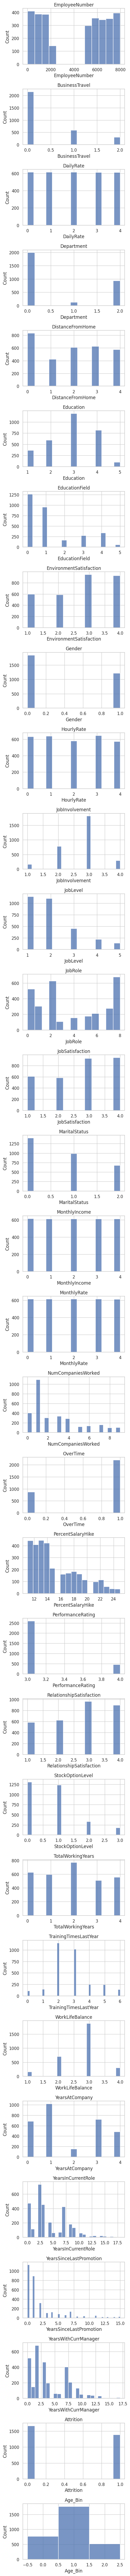

In [1321]:
# histograms after feature engeeniring

fig, axes = plt.subplots(nrows=len(columns_to_show), figsize = (5,3*len(columns_to_show)))

for i, column in enumerate (columns_to_show):
    sns.histplot(data=train_DF, x=column, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.savefig('Histograms after feature engeeniring for train_DF')
plt.show()

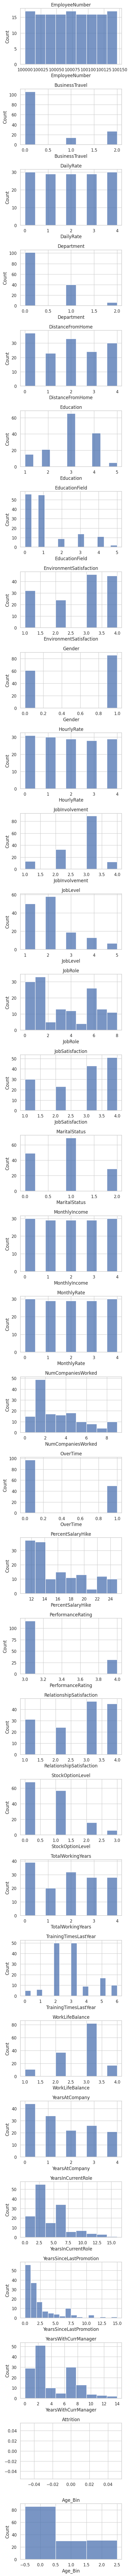

In [1322]:
# histograms after feature engeeniring

fig, axes = plt.subplots(nrows=len(columns_to_show), figsize = (5,3*len(columns_to_show)))

for i, column in enumerate (columns_to_show):
    sns.histplot(data=X_test, x=column, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.savefig('Histograms after feature engeeniring for X_test')
plt.show()

### 8. ANALYSIS OF THE SIGNIFICANCE OF VARIABLES BASED ON REGRESSION COEFFICIENTS

Correlation verification after EDA and feature engineering

Employee number is not feature influence on attrition, therefore column "EmployeeNumber" will be removed from train_DF dataframe

In [1323]:
Popped_att = train_DF.pop('EmployeeNumber')
train_DF

BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0                  0          2           0                 0        1.0   
1                  0          1           0                 0        2.0   
2                  0          2           0                 2        3.0   
3                  0          3           0                 2        2.0   
4                  0          1           0                 1        2.0   
...              ...        ...         ...               ...        ...   
4438               0          1           0                 4        4.0   
4440               0          4           0                 2        3.0   
4442               0          4           0                 2        3.0   
4443               0          1           0                 3        3.0   
4446               2          0           0                 2        3.0   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  0                      4.0       0           1   
1                  1                      4.0       1           1   
2                  2                      3.0       1           1   
3                  0                      4.0       1           2   
4                  2                      3.0       0           3   
...              ...                      ...     ...         ...   
4438               0                      1.0       1           2   
4440               1                      3.0       0           3   
4442               1                      3.0       0           3   
4443               1                      1.0       1           2   
4446               1                      1.0       0           1   

      JobInvolvement  ...  StockOptionLevel  TotalWorkingYears  \
0                2.0  ...               2.0                  2   
1                2.0  ...               1.0                  2   
2                2.0  ...               0.0                  0   
3                3.0  ...               0.0                  0   
4                3.0  ...               1.0                  0   
...              ...  ...               ...                ...   
4438             2.0  ...               1.0                  4   
4440             3.0  ...               1.0                  2   
4442             3.0  ...               1.0                  2   
4443             3.0  ...               1.0                  2   
4446             1.0  ...               0.0                  2   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                       1.0              2.0               3   
1                       6.0              4.0               1   
2                       3.0              2.0               1   
3                       3.0              3.0               1   
4                       3.0              3.0               0   
...                     ...              ...             ...   
4438                    3.0              3.0               4   
4440                    3.0              4.0               4   
4442                    3.0              4.0               4   
4443                    2.0              3.0               3   
4446                    5.0              3.0               1   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                    8.0                      3.0                   0.0   
1                    4.0                      0.0                   2.0   
2                    4.0                      4.0                   3.0   
3                    3.0                      0.0                   2.0   
4                    0.0                      0.0                   0.0   
...                  ...                      ...                   ...   
4438                 3.0                      0.0                  10.0   
4440                 7.0                      5.0                   7.0   
4442                 7.0   

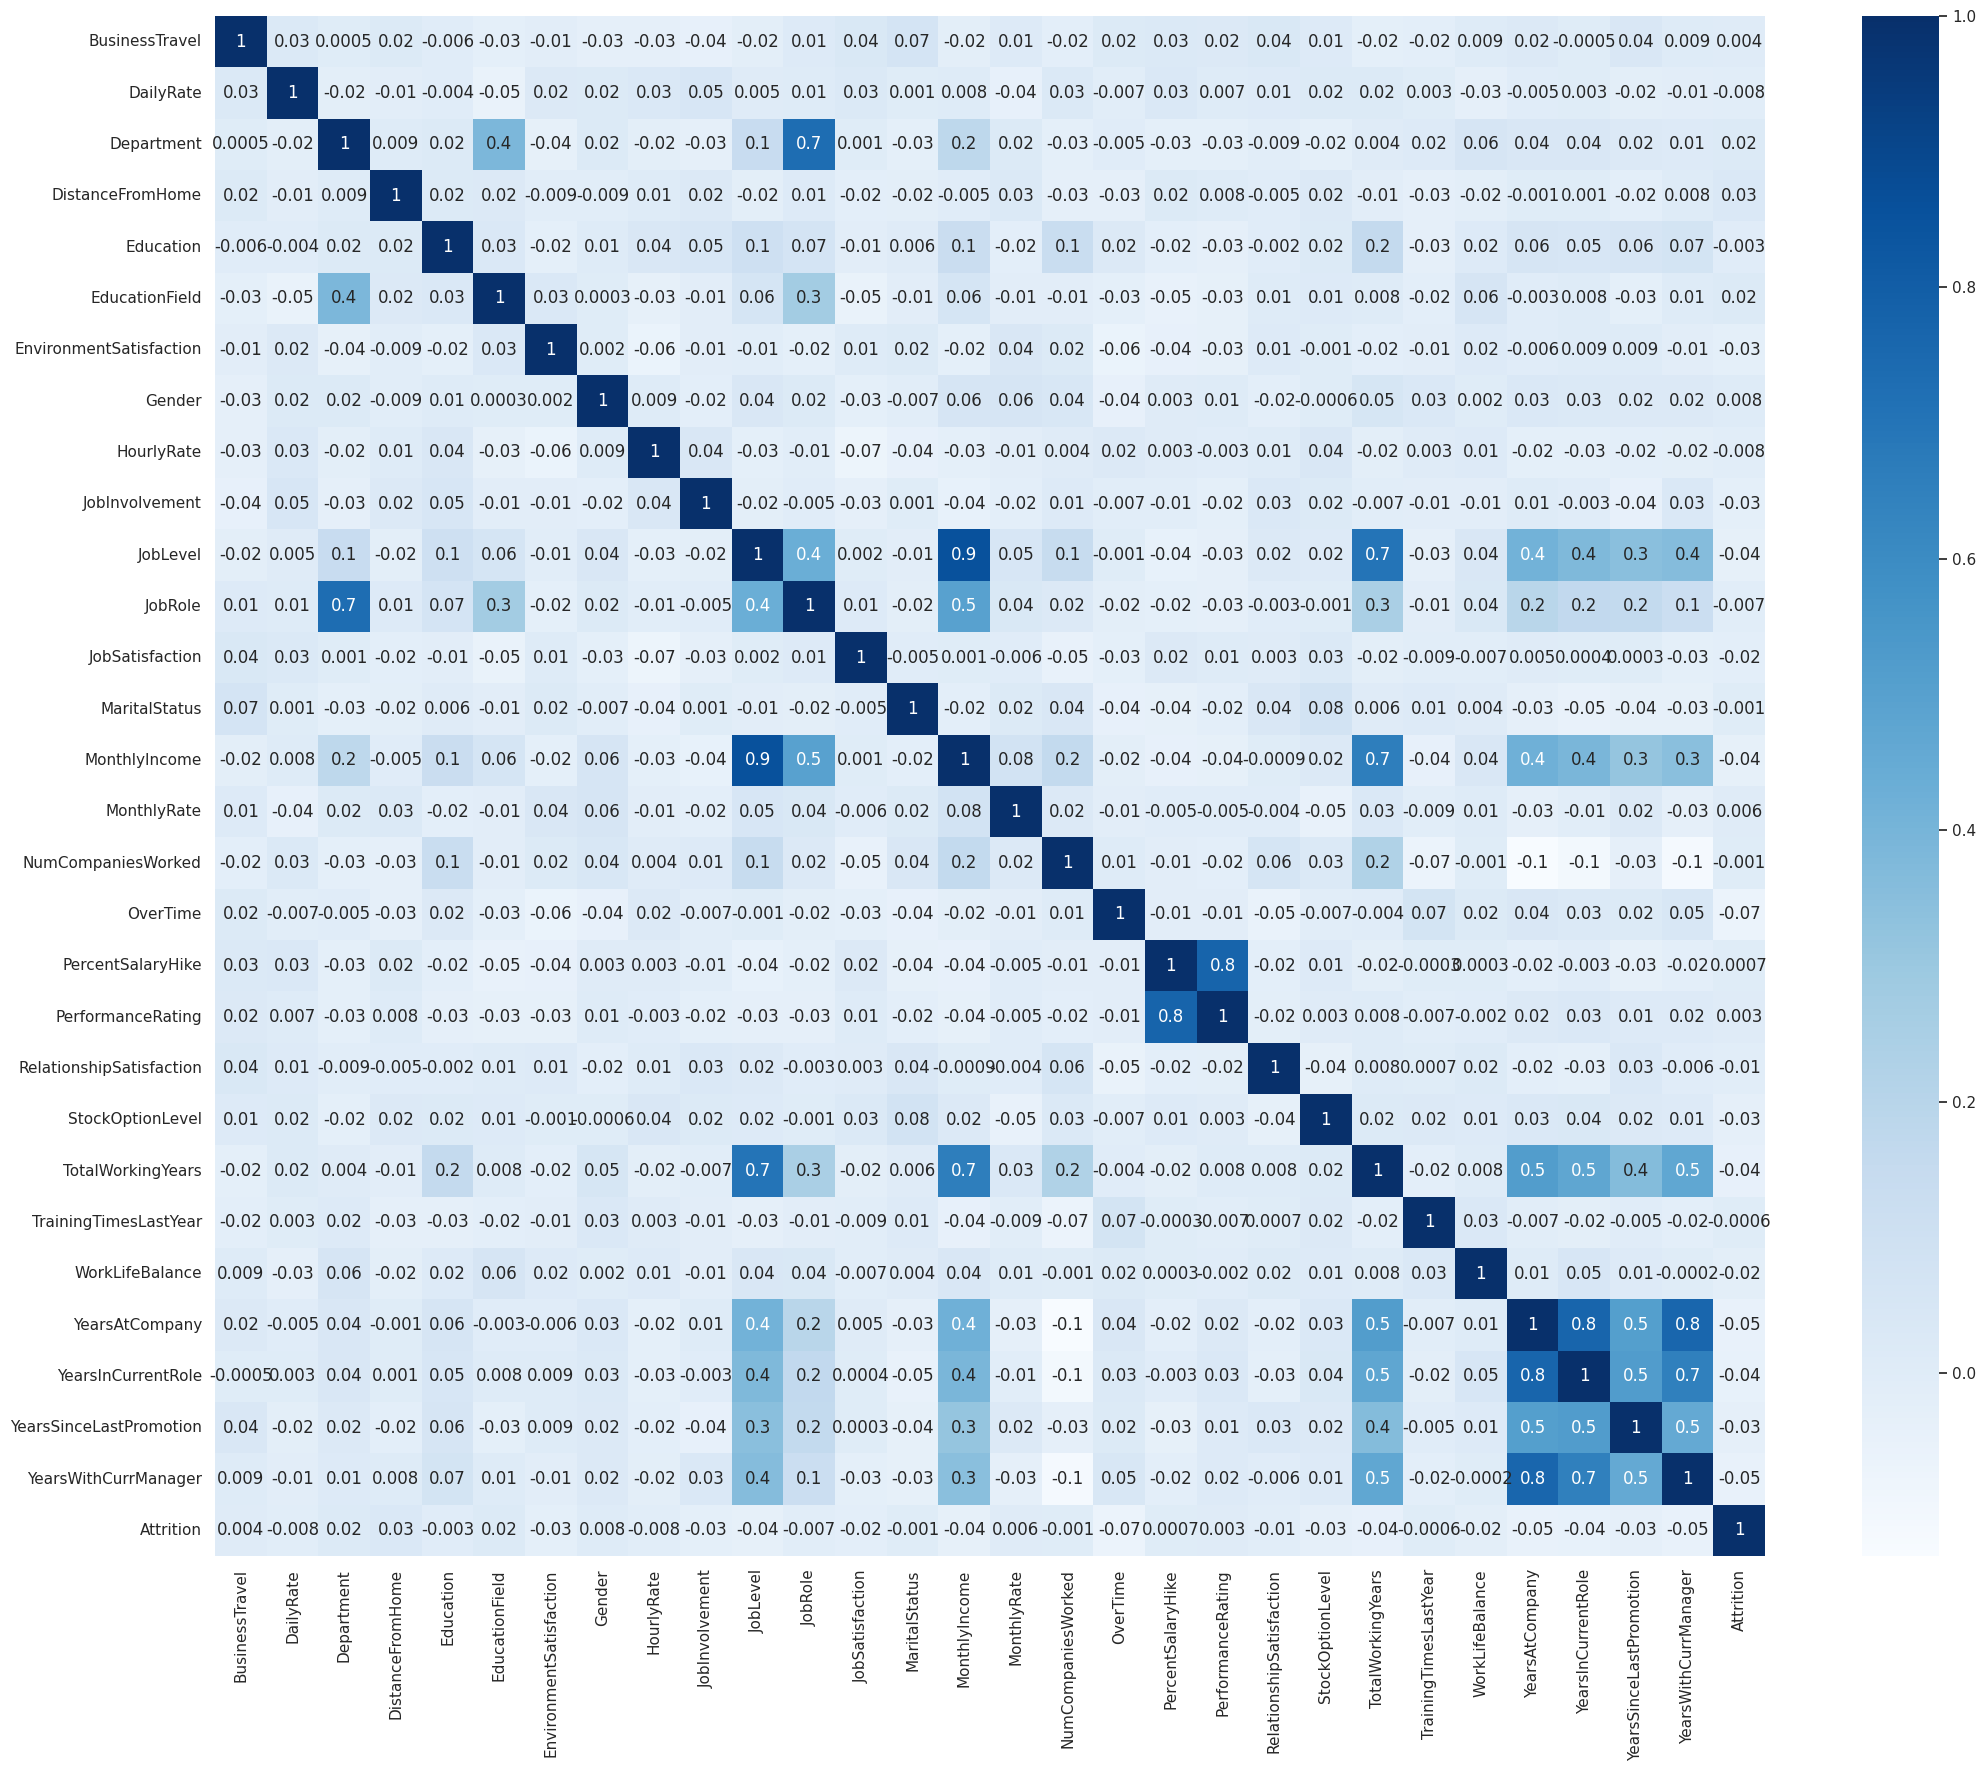

In [1324]:
plt.figure(figsize=(25,20))
sns.set_theme(style="white")
corr = train_DF.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')
plt.savefig('Correlation map')

In [1325]:
Correlation_for_Attition=corr['Attrition']
Correlation_for_Attition

BusinessTravel              0.003827
DailyRate                  -0.007584
Department                  0.016095
DistanceFromHome            0.032471
Education                  -0.002619
EducationField              0.019390
EnvironmentSatisfaction    -0.025974
Gender                      0.007769
HourlyRate                 -0.008158
JobInvolvement             -0.026260
JobLevel                   -0.035812
JobRole                    -0.007030
JobSatisfaction            -0.020571
MaritalStatus              -0.001093
MonthlyIncome              -0.035269
MonthlyRate                 0.005983
NumCompaniesWorked         -0.001498
OverTime                   -0.067635
PercentSalaryHike           0.000741
PerformanceRating           0.002878
RelationshipSatisfaction   -0.009995
StockOptionLevel           -0.032147
TotalWorkingYears          -0.040128
TrainingTimesLastYear      -0.000619
WorkLifeBalance            -0.017744
YearsAtCompany             -0.049714
YearsInCurrentRole         -0.041596
Y

In [1326]:
# Correlation to absolute value transformation and sorting

Correlation_sorted = np.absolute(Correlation_for_Attition).sort_values()
Correlation_sorted

TrainingTimesLastYear       0.000619
PercentSalaryHike           0.000741
MaritalStatus               0.001093
NumCompaniesWorked          0.001498
Education                   0.002619
PerformanceRating           0.002878
BusinessTravel              0.003827
MonthlyRate                 0.005983
JobRole                     0.007030
DailyRate                   0.007584
Gender                      0.007769
HourlyRate                  0.008158
RelationshipSatisfaction    0.009995
Department                  0.016095
WorkLifeBalance             0.017744
EducationField              0.019390
JobSatisfaction             0.020571
EnvironmentSatisfaction     0.025974
JobInvolvement              0.026260
YearsSinceLastPromotion     0.029150
StockOptionLevel            0.032147
DistanceFromHome            0.032471
MonthlyIncome               0.035269
JobLevel                    0.035812
TotalWorkingYears           0.040128
YearsInCurrentRole          0.041596
YearsWithCurrManager        0.047088
Y

In [1327]:
Correlation_sorted_50perc = Correlation_sorted>0.5
Correlation_sorted_50perc

TrainingTimesLastYear       False
PercentSalaryHike           False
MaritalStatus               False
NumCompaniesWorked          False
Education                   False
PerformanceRating           False
BusinessTravel              False
MonthlyRate                 False
JobRole                     False
DailyRate                   False
Gender                      False
HourlyRate                  False
RelationshipSatisfaction    False
Department                  False
WorkLifeBalance             False
EducationField              False
JobSatisfaction             False
EnvironmentSatisfaction     False
JobInvolvement              False
YearsSinceLastPromotion     False
StockOptionLevel            False
DistanceFromHome            False
MonthlyIncome               False
JobLevel                    False
TotalWorkingYears           False
YearsInCurrentRole          False
YearsWithCurrManager        False
YearsAtCompany              False
OverTime                    False
Attrition     

In [1328]:
significant_variable = Correlation_sorted[Correlation_sorted>0.5]
significant_variable

Attrition    1.0
Name: Attrition, dtype: float64

### 8. X_train, y_train, X_test, y_test PREPARATION


from train_DF following will be prepared
X_train = train_DF-train_DF['Attrition']
y_train = train_DF['Attrition']
///
from X_test following will be prepared
X_test = X_test - X_test['Attrition']
y_test = target['Attrition]

In [1329]:
y_train = train_DF.pop('Attrition')

In [1330]:
X_train = train_DF

In [1331]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [1332]:
X_train.head()

BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0               0          2           0                 0        1.0   
1               0          1           0                 0        2.0   
2               0          2           0                 2        3.0   
3               0          3           0                 2        2.0   
4               0          1           0                 1        2.0   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0               0                      4.0       0           1   
1               1                      4.0       1           1   
2               2                      3.0       1           1   
3               0                      4.0       1           2   
4               2                      3.0       0           3   

   JobInvolvement  ...  RelationshipSatisfaction  StockOptionLevel  \
0             2.0  ...                       3.0               2.0   
1             2.0  ...                       4.0               1.0   
2             2.0  ...                       3.0               0.0   
3             3.0  ...                       4.0               0.0   
4             3.0  ...                       3.0               1.0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  2                    1.0              2.0               3   
1                  2                    6.0              4.0               1   
2                  0                    3.0              2.0               1   
3                  0                    3.0              3.0               1   
4                  0                    3.0              3.0               0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  Age_Bin  
0                 8.0                      3.0                   0.0        0  
1                 4.0                      0.0                   2.0        1  
2                 4.0                      4.0                   3.0        0  
3                 3.0                      0.0                   2.0        0  
4                 0.0                      0.0                   0.0        1  

[5 rows x 30 columns]

In [1333]:
X_train.shape

(3065, 30)

In [1334]:
# y_test preparation. y_test is the column ['Attrition] from test_target.csv file (variable "target" prepared at the begining
# the order of operations is important
y_test = target['Attrition']
y_test.head()

0    0
1    0
2    0
3    0
4    1
Name: Attrition, dtype: int64

In [1335]:
X_test.drop(['Attrition', 'EmployeeNumber'], axis = 1, inplace=True)

In [1336]:
y_test.shape

(147,)

In [1337]:
X_test.shape

(147, 30)

### 9. DATA BALANCE VERIFICATION FOR y_train

In [1338]:

def check_data_balance(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    class_balance = dict(zip(unique_labels, counts))
    total_samples = len(labels)

    for label, count in class_balance.items():
        percentage = (count / total_samples) * 100
        print("Label {}: {} samples, {}% of the dataset".format(label, count, percentage))

    return class_balance


# Data balance for y_train verification
class_balance = check_data_balance(y_train)


Label 0: 1672 samples, 54.55138662316477% of the dataset
Label 1: 1393 samples, 45.44861337683523% of the dataset


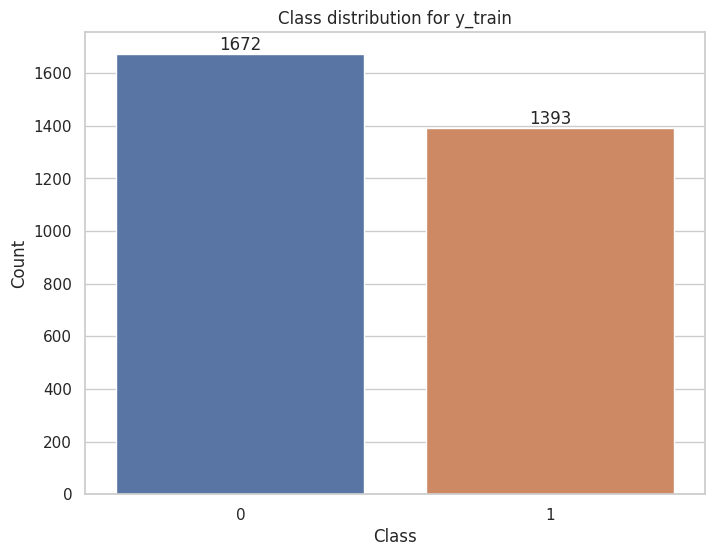

In [1339]:
# Convert class_balance dictionary to DataFrame
class_balance_df = pd.DataFrame.from_dict(class_balance, orient='index', columns=['Count'])

# Seaborn chart style setting
sns.set(style='whitegrid')

# Plot generating
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_balance_df.index, y='Count', data=class_balance_df)
plt.title('Class distribution for y_train')
plt.xlabel('Class')
plt.ylabel('Count')

# Adding rounded count values to the chart
for p in ax.patches:
    count = int(p.get_height())  # Round to integer
    ax.annotate(str(count), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.savefig('Class distribution for y_train ')
plt.show()


The ratio of the number of samples between different classes in this case is 1672 / 1393 ≈ 1.20. This ratio is not significantly different from 1, so model training will be done on this dataset

### 10. MODEL TRAINING and EVALUATION

a) Model testing and evaluation via ModelTrainer class from Model_trainer.py and Analyze_data_for_Model_trainer_script.py

In [1340]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [1341]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [1342]:
from Model_trainer_script import ModelTrainer

In [1343]:
!python Analyze_data_for_Model_trainer_script.py --X_train /content/X_train.csv --X_test /content/X_test.csv --y_train /content/y_train.csv --y_test /content/y_test.csv


LogisticRegression metrics on training data:
LogisticRegression metrics:
  Accuracy:  0.5582381729200653
  Precision: 0.5504951075002709
  Recall:    0.5582381729200653
  F1 score:  0.5077187434642574
  Mislabeled 1354 out of 3065


Selected Features:
  DistanceFromHome
  JobLevel
  MonthlyIncome
  OverTime
  StockOptionLevel
  TotalWorkingYears
  YearsAtCompany
  YearsInCurrentRole
  YearsSinceLastPromotion
  YearsWithCurrManager


_____
LogisticRegression metrics on test data:
LogisticRegression metrics:
  Accuracy:  0.5374149659863946
  Precision: 0.704621158808351
  Recall:    0.5374149659863946
  F1 score:  0.5968901846452866
  Mislabeled 68 out of 147


KNN metrics on training data:
KNN metrics:
  Accuracy:  0.6274061990212072
  Precision: 0.6277774136615715
  Recall:    0.6274061990212072
  F1 score:  0.6150256955547624
  Mislabeled 1142 out of 3065


Selected Features:
  DistanceFromHome
  JobLevel
  MonthlyIncome
  OverTime
  StockOptionLevel
  TotalWorkingYears
  YearsAtCompa

Conclusion:

---


*Feature_selection='KBest' provides comparable results to feature_selection='PCA'. The differences in performance among the classifiers are not significantly different - they are of the same order of magnitude.*

Premise:

---



---


*The best results were achieved with the SVM model and the Decision Tree Classifier. Considering that the Decision Tree Classifier yielded more reliable results (higher metrics for the training set, lower for the test set) compared to the SVM model (which had the opposite results - lower on the training set, higher on the test set), the Decision Tree Classifier will be used for prediction.*

In [1344]:
# Calling the script and capturing the output
result = subprocess.run(['python', 'Analyze_data_for_Model_trainer_script.py', '--X_train', '/content/X_train.csv',
                         '--X_test', '/content/X_test.csv', '--y_train', '/content/y_train.csv',
                         '--y_test', '/content/y_test.csv'], capture_output=True, text=True)

# Output Processing and Retrieving "Selected Features" Values
output_lines = result.stdout.strip().split('\n')
KBest_selected_features = []
selected_features_flag = False
for line in output_lines:
    if line == "Selected Features:":
        selected_features_flag = True
    elif selected_features_flag and line:
        KBest_selected_features.append(line.strip())

# Remove unnecessary lines after "_____"
KBest_selected_features = KBest_selected_features[:KBest_selected_features.index('_____')]

# Displaying a list with "Selected Features" values
print(KBest_selected_features)


['DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [1345]:
KBest_selected_features

['DistanceFromHome',
 'JobLevel',
 'MonthlyIncome',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

b) Verification of feature importance using "feature_importances" of a selected model (DTC)

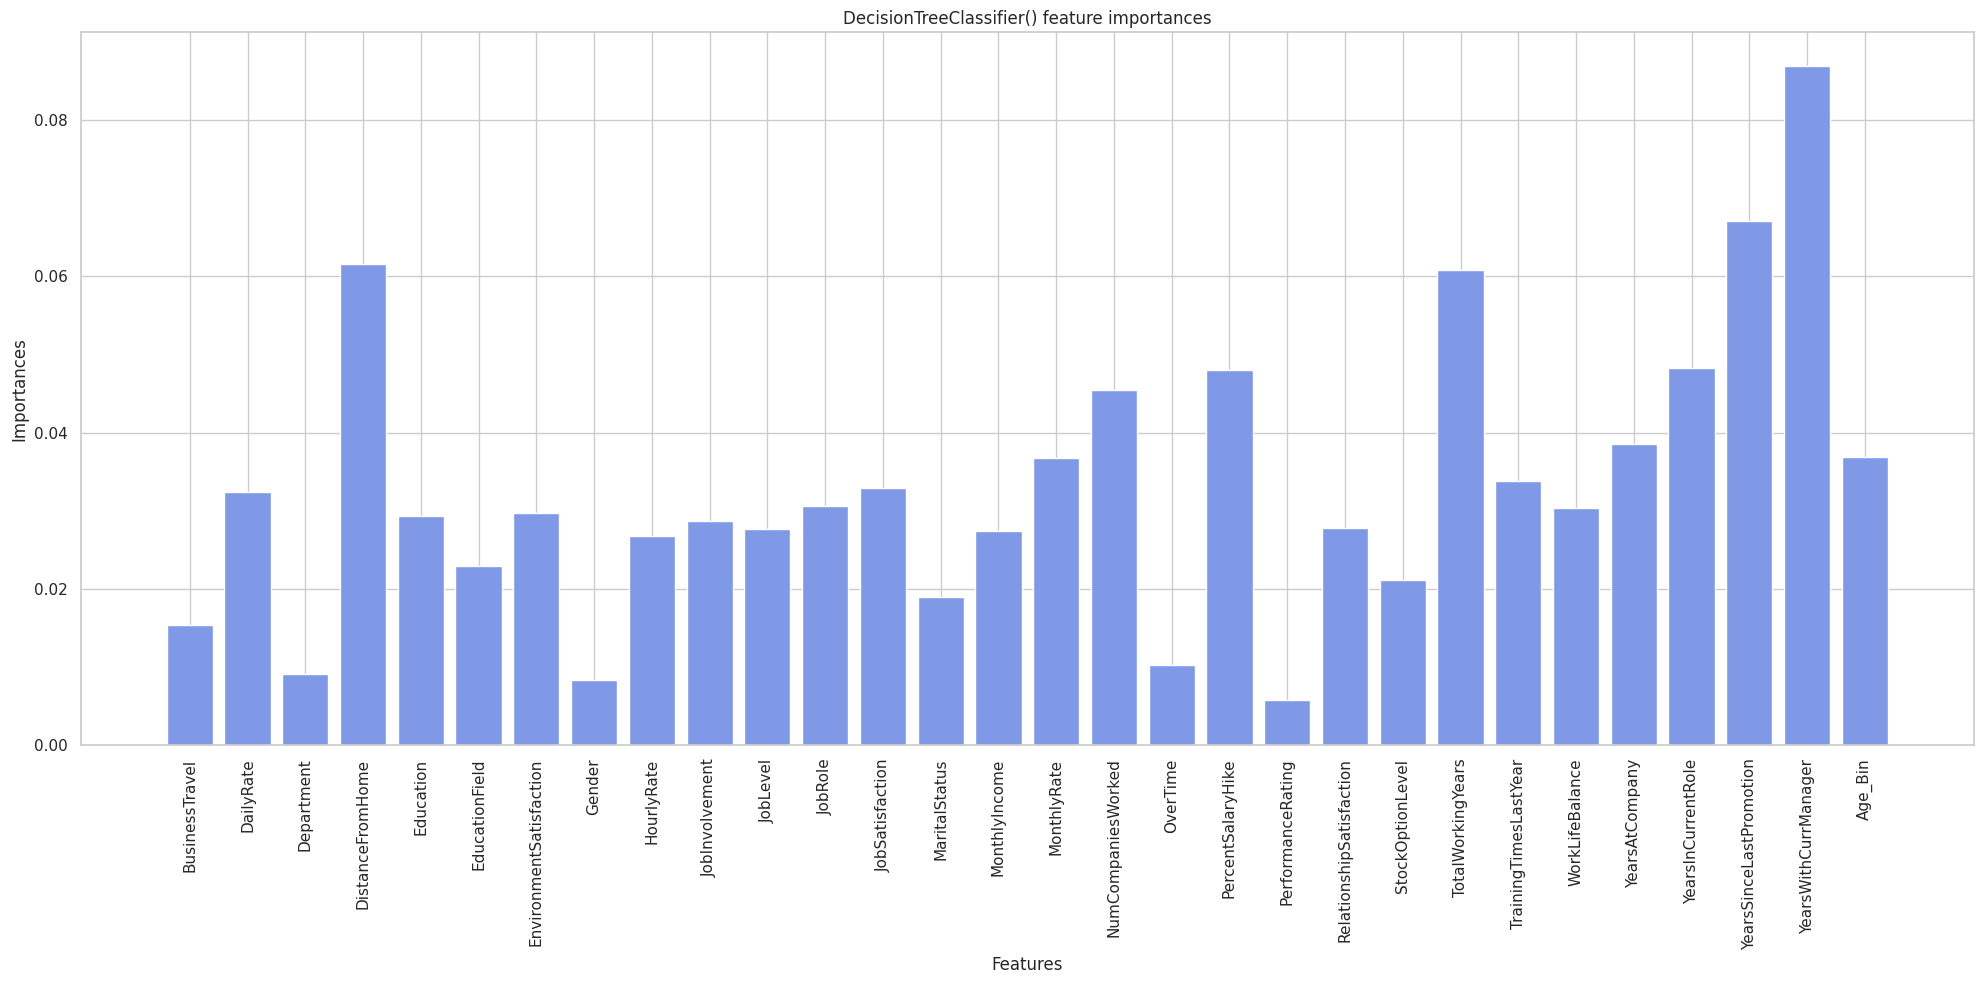

In [1346]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10))
model_feature_importances = dtc_model.feature_importances_

plt.bar(X_train.columns, model_feature_importances, color = (0.5, 0.6, 0.9))
plt.title(f'{dtc_model} feature importances')
plt.xlabel("Features")
plt.ylabel("Importances")
plt.xticks(rotation = 'vertical')

plt.tight_layout()
plt.savefig('Feature importances by KBest for Decision Tree Classifier')
plt.show()


In [1347]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Creation of the DecisionTreeClassifier model
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

# Calculate and print feature_importances for the DecisionTreeClassifier model
dtc_feature_importances = dtc_model.feature_importances_
feature_importances_DTC = sorted(zip(X_train.columns, dtc_feature_importances), key=lambda x: x[1], reverse=True)
# Print a list of the top 10 features
top_feature_importances_DTC = [feature for feature, _ in important_features_dtc[:10]]
print("\nTop 10 Features importances for DTC:")
print(top_feature_importances_DTC)



Top 10 Features importances for DTC:
['YearsWithCurrManager', 'DistanceFromHome', 'YearsSinceLastPromotion', 'TotalWorkingYears', 'YearsInCurrentRole', 'NumCompaniesWorked', 'PercentSalaryHike', 'YearsAtCompany', 'JobRole', 'Age_Bin']


c) Comparison of the significance of features according to feature importances and KBest method

In [1348]:
# Common features
common_features = list(set(KBest_selected_features) & set(top_feature_importances_DTC))

# Features unique to KBest_features
unique_kbest_features = list(set(KBest_selected_features) - set(top_feature_importances_DTC))

# Features unique to the feature_importances_ DTC model
unique_dtc_features = list(set(top_feature_importances_DTC) - set(KBest_selected_features))

# Results display
print("Common Features:")
print(common_features)
print("\nUnique KBest Features:")
print(unique_kbest_features)
print("\nUnique DTC Features:")
print(unique_dtc_features)


Common Features:
['YearsWithCurrManager', 'YearsAtCompany', 'YearsInCurrentRole', 'TotalWorkingYears', 'YearsSinceLastPromotion', 'DistanceFromHome']

Unique KBest Features:
['JobLevel', 'MonthlyIncome', 'StockOptionLevel', 'OverTime']

Unique DTC Features:
['Age_Bin', 'NumCompaniesWorked', 'JobRole', 'PercentSalaryHike']


d) Verification of model metrics for DTC for features selected in 'Feature_importances'

In [1349]:
selected_features = top_feature_importances_DTC
selected_features

['YearsWithCurrManager',
 'DistanceFromHome',
 'YearsSinceLastPromotion',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'YearsAtCompany',
 'JobRole',
 'Age_Bin']

In [1350]:
X_train_feature_importances = X_train[selected_features]
X_test_feature_importances = X_test[selected_features]

model_DTC_feature_importances = DecisionTreeClassifier()
model_DTC_feature_importances.fit(X_train_feature_importances, y_train)

y_predict_train_model_DTC_feature_importances = model_DTC_feature_importances.predict(X_train_feature_importances)
y_predict_test_model_DTC_feature_importances = model_DTC_feature_importances.predict(X_test_feature_importances)

In [1351]:
from Functions import calculate_metrics, print_results

# Calculation of metrics for model_DTC_feature_importances
accuracy_train, precision_train, recall_train, f1_train, mislabeled_train, total_train = calculate_metrics(y_train.values.ravel(), y_predict_train_model_DTC_feature_importances)
accuracy_test, precision_test, recall_test, f1_test, mislabeled_test, total_test = calculate_metrics(y_test.values.ravel(), y_predict_test_model_DTC_feature_importances)

# View metrics for the model_DTC_feature_importances model
print_results((accuracy_train, precision_train, recall_train, f1_train, mislabeled_train, total_train), classifier_id='model_DTC_feature_importances (train)')
print_results((accuracy_test, precision_test, recall_test, f1_test, mislabeled_test, total_test), classifier_id='model_DTC_feature_importances (test)')


# Adding the results to the file
with open('Model_training_results.html', 'a') as file:
    file.write('\n\n')
    file.write('Metrics for model_DTC_feature_importances:\n')
    file.write(f'Train Metrics:\n{accuracy_train, precision_train, recall_train, f1_train, mislabeled_train, total_train}\n')
    file.write(f'Test Metrics:\n{accuracy_test, precision_test, recall_test, f1_test, mislabeled_test, total_test}\n')

print("Results added to Model_training_results.html")


Results for model_DTC_feature_importances (train)
----
  Accuracy:  0.73278955954323
  Precision: 0.8117819378862531
  Recall:    0.73278955954323
  F1 score:  0.7052391172118287
  Mislabeled 819 out of 3065


Results for model_DTC_feature_importances (test)
----
  Accuracy:  0.5170068027210885
  Precision: 0.6980887593132491
  Recall:    0.5170068027210885
  F1 score:  0.5797645394989579
  Mislabeled 71 out of 147


Results added to Model_training_results.html


Conclusion and premise:

---


*Better results were achieved by training the Decision Tree Classifier model on features selected using the KBest method. Therefore, final prediction will be performed using these features.*

### 11. PREDICTION FOR BEST MODEL

In [1352]:
param_grid = {}
decision_tree_trainer = ModelTrainer()
decision_tree_trainer.build_pipeline('DecisionTree', feature_selection='KBest')
decision_tree_trainer.build_grid_search(param_grid)
decision_tree_trainer.train(X_train, y_train)

prediction_DecisionTreeClassifier = decision_tree_trainer.predict(X_test)  # Prediction on test data

warnings.filterwarnings("ignore")
prediction_DecisionTreeClassifier


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [1353]:
y_test = np.array(y_test)
y_test = np.ravel(y_test)
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

### 12. PROJECT SUMMARY

In this project, employee attrition prediction was performed for the following models: LogisticRegression, SVC, GaussianNB, KNeighborsClassifier, DecisionTreeClassifier, AdaBoostClassifier, XGBClassifier, CatBoostClassifier, LGBMClassifier. Unfortunately, none of the trained models achieved results above 0.8 on the test set. The obtained results ranged from 0.5 to 0.7. The DecisionTreeClassifier model yielded the best results and was used for the final prediction. The models were tested using two feature selection methods: KBest and PCA. The KBest feature selection method yielded better results. For the KBest feature selection method, the models were also tested with different numbers of selected features, namely 7 and 10 features. Slightly worse results were obtained for 7 selected features compared to 10 features, so the models were ultimately trained using 10 features.

Furthermore, for the selected model, DecisionTreeClassifier, two additional feature selection methods were compared: KBest and Feature_importances. Out of the 10 selected features, 6 features were common to both methods. The KBest method achieved slightly better results than the Feature_importances method, so the model trained on KBest features was used for the final prediction.

Considering that the metrics obtained for different models, as well as the choice of different feature selection methods and the number of features, did not significantly improve the model performance, it is recommended to further examine the data and:
 * train models on data without removing duplicates,
 * reevaluate outliers,
 * choose different feature binning methods during feature engineering.